In [ ]:
#Importing the usefull libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing the dataset

data = pd.read_csv('/content/drive/MyDrive/aerofit_treadmill.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#Non- Graphical Analysis

In [ ]:
#Shape of data

data.shape

(180, 11)

In [ ]:
#Length of data

len(data)

180

In [ ]:
#Checking datatype

data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

####There are 3 catogerical 
####and 6 numerical data type

In [ ]:
# Uniques value for each columns
for i in data.columns:
  # print(data[i].value_counts())
  print(i,data[i].nunique())

Product 3
Age 32
Gender 2
Education 8
MaritalStatus 2
Usage 6
Fitness 5
Income 62
Miles 37


In [ ]:
# Value count for Product,Gender,MaritalStatus,Usage,Fitness

print(data['Product'].value_counts())
print(data['Gender'].value_counts())
print(data['Education'].value_counts())
print(data['MaritalStatus'].value_counts())
print(data['Usage'].value_counts())
print(data['Fitness'].value_counts())


KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
Male      104
Female     76
Name: Gender, dtype: int64
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64


In [ ]:
#Checking Null values

data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

##Descriptive Statisics

In [ ]:
#Age,Education,Usage,Fitness,Income,Miles

data.describe(include=[np.number])

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


####Average Age of a user is between: 28-29
####Average user has a 15-16 years of education
####Average number of time a treadmill is used each week is: 3.45
####Average Fitness level for people using a treadmill is: 3.3
####Average mile a treadmill is used each week is: 103.2



###Product,Gender,MaritalStatus

In [ ]:

data.describe(include = [np.object])

<ipython-input-10-b8981d6a1a03>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include = [np.object])


,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
#Percent of Product,Gender and Marital Status

l=len(data)
Products = data['Product'].value_counts()
print('% share of each product')
for i in range(len(Products)):
  print(Products.index[i],':',round((Products[i]/l)*100,2),'%')

Genders = data['Gender'].value_counts()
print('% share of each gender')
for i in range(len(Genders)):
  print(Genders.index[i],':',round((Genders[i]/l)*100,2),'%')

MS = data['MaritalStatus'].value_counts()
print('% share of each Marital Status')
for i in range(len(MS)):
  print(MS.index[i],':',round((MS[i]/l)*100,2),'%')


% share of each product
KP281 : 44.44 %
KP481 : 33.33 %
KP781 : 22.22 %
% share of each gender
Male : 57.78 %
Female : 42.22 %
% share of each Marital Status
Partnered : 59.44 %
Single : 40.56 %


####Most of the users are male with 57.72% .
####Most sold product is KP281 followed by KP481 and KP781, respectively.
####Most of the people buying a product is Partnered with 59.44% of the total users.

In [ ]:
#Outliers Function
def outliers(s):
  Q1 = s.quantile(.25)
  Q2 = s.quantile(.75)
  IQR = Q2-Q1
  mask1 = Q1 - IQR*1.5
  mask2 = Q2 + IQR*1.5
  mask = (s < mask1) | (s > mask2)
  ss = s[mask]
  return ss

###Fitness

In [ ]:
#Understanding Fitness
##Fitness vs Miles
#Finding the miles run/walk by fitness level associated with each user

uni = np.sort(data['Fitness'].unique())
uni

for i in uni:
  val = data.loc[data['Fitness'] == i,['Fitness','Miles']]
  print(f"Fitness Level : {i}, Average Miles walked/run : {round(np.mean(val['Miles']),2)}, Range : {np.max(val['Miles'])-np.min(val['Miles'])}")


Fitness Level : 1, Average Miles walked/run : 34.0, Range : 26
Fitness Level : 2, Average Miles walked/run : 51.69, Range : 47
Fitness Level : 3, Average Miles walked/run : 87.19, Range : 117
Fitness Level : 4, Average Miles walked/run : 131.62, Range : 138
Fitness Level : 5, Average Miles walked/run : 178.94, Range : 280


In [ ]:
#Percent Share of each Fitness level
Fitness = data['Fitness'].value_counts()


print('% user at each level')
for i in np.sort(Fitness.index):
  print(i,':',round((Fitness[i]/l)*100,2),'%')


% user at each level
1 : 1.11 %
2 : 14.44 %
3 : 53.89 %
4 : 13.33 %
5 : 17.22 %


In [ ]:
#Avg miles walk/run on treadmill

np.mean(data['Miles'])

103.19444444444444

In [ ]:
#Avg Fitness level of the Product user

data.groupby('Product')['Fitness'].aggregate(['mean','std'])


,mean,std
Product,,
KP281,2.9625,0.664540
KP481,2.9000,0.629770
KP781,4.6250,0.667467


In [ ]:
#Gender vs Fitness Level

data.groupby('Gender')['Fitness'].aggregate(['mean','std'])

,mean,std
Gender,,
Female,3.026316,0.832245
Male,3.519231,0.994946


####Mean Fitness and majority of the users are at Fitness Level 3
####Average users of KP281 and KP481 are at Fitness level 3 and KP781 is at 4.6
####Avg Fitness level of a male is 3.5 and female is 3
####More the fitness level, more will be the miles walk/run by the user on the treadmill.

###Age

In [ ]:
#Understanding Age

data['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [ ]:
#Avge age of a user of each product

data.groupby('Product')['Age'].aggregate(['mean','std'])

,mean,std
Product,,
KP281,28.55,7.221452
KP481,28.90,6.645248
KP781,29.10,6.971738


In [ ]:
#Age Outliers

Age_outliers = outliers(data['Age'])
print(Age_outliers)

78     47
79     50
139    48
178    47
179    48
Name: Age, dtype: int64


In [ ]:
#Min and Max with/out outliers

min_age = np.min(data['Age'])
max_age = np.max(data['Age'])
max_age_wo_outliers = np.max(data.loc[data['Age']<np.min(Age_outliers),'Age'])
print(f"min:{min_age} max:{max_age} max without outliers:{max_age_wo_outliers}")
print('Percent of outlier in Age',round(100*Age_outliers.count()/l,2))

min:18 max:50 max without outliers:46
Percent of outlier in Age 2.78


In [ ]:
#Analyzing Age by creataing 6 bins-> 1 being lowest and 6 being highest

bin_width = (max_age-min_age)/5
bins = [min_age]
start = min_age
for i in range(6):
  start = start + bin_width
  bins.append(int(start))
print(bins) 
labels = [1,2,3,4,5,6]
data['Age Level'] = pd.cut(x = data['Age'], bins = bins, labels = labels,include_lowest = True)
data.head(5)

[18, 24, 30, 37, 43, 49, 56]


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age Level
0,KP281,18,Male,14,Single,3,4,29562,112,1
1,KP281,19,Male,15,Single,2,3,31836,75,1
2,KP281,19,Female,14,Partnered,4,3,30699,66,1
3,KP281,19,Male,12,Single,3,3,32973,85,1
4,KP281,20,Male,13,Partnered,4,2,35247,47,1


In [ ]:
#Product in each Age Level
data.groupby('Age Level')['Product'].value_counts().unstack().fillna(0)

Product,KP281,KP481,KP781
Age Level,,,
1,27.0,17.0,10.0
2,28.0,18.0,20.0
3,13.0,18.0,4.0
4,8.0,5.0,3.0
5,3.0,2.0,3.0
6,1.0,0.0,0.0


In [ ]:
#Percent of Product sold in each age level
unique_products = data['Product'].unique()
unique_age_level = data['Age Level'].unique()

for i in unique_age_level:
  la = len(data[data['Age Level'] == i])
  for j in unique_products:
    d = round(100*len(data[(data['Product']==j) & (data['Age Level'] == i)])/la,2)
    print(f"Age Level {i} and % Product {j} sold is {d}% ")
  print('------------------------------------')

Age Level 1 and % Product KP281 sold is 50.0% 
Age Level 1 and % Product KP481 sold is 31.48% 
Age Level 1 and % Product KP781 sold is 18.52% 
------------------------------------
Age Level 2 and % Product KP281 sold is 42.42% 
Age Level 2 and % Product KP481 sold is 27.27% 
Age Level 2 and % Product KP781 sold is 30.3% 
------------------------------------
Age Level 3 and % Product KP281 sold is 37.14% 
Age Level 3 and % Product KP481 sold is 51.43% 
Age Level 3 and % Product KP781 sold is 11.43% 
------------------------------------
Age Level 4 and % Product KP281 sold is 50.0% 
Age Level 4 and % Product KP481 sold is 31.25% 
Age Level 4 and % Product KP781 sold is 18.75% 
------------------------------------
Age Level 5 and % Product KP281 sold is 37.5% 
Age Level 5 and % Product KP481 sold is 25.0% 
Age Level 5 and % Product KP781 sold is 37.5% 
------------------------------------
Age Level 6 and % Product KP281 sold is 100.0% 
Age Level 6 and % Product KP481 sold is 0.0% 
Age Lev

In [ ]:
for i in unique_products:
  lap = len(data[data['Product'] == i])
  for j in unique_age_level:
    d = round(100*len(data[(data['Product']==i) & (data['Age Level'] == j)])/lap,2)
    print(f"Age Level {j} and % Product {i} sold is {d}% ")
  print('------------------------------------')

Age Level 1 and % Product KP281 sold is 33.75% 
Age Level 2 and % Product KP281 sold is 35.0% 
Age Level 3 and % Product KP281 sold is 16.25% 
Age Level 4 and % Product KP281 sold is 10.0% 
Age Level 5 and % Product KP281 sold is 3.75% 
Age Level 6 and % Product KP281 sold is 1.25% 
------------------------------------
Age Level 1 and % Product KP481 sold is 28.33% 
Age Level 2 and % Product KP481 sold is 30.0% 
Age Level 3 and % Product KP481 sold is 30.0% 
Age Level 4 and % Product KP481 sold is 8.33% 
Age Level 5 and % Product KP481 sold is 3.33% 
Age Level 6 and % Product KP481 sold is 0.0% 
------------------------------------
Age Level 1 and % Product KP781 sold is 25.0% 
Age Level 2 and % Product KP781 sold is 50.0% 
Age Level 3 and % Product KP781 sold is 10.0% 
Age Level 4 and % Product KP781 sold is 7.5% 
Age Level 5 and % Product KP781 sold is 7.5% 
Age Level 6 and % Product KP781 sold is 0.0% 
------------------------------------


In [ ]:
#Percent of users in each level

a_level = data['Age Level'].value_counts()
# print(a_level)
print('% user at each level')
for i in range(6):
  print(a_level.index[i],':',round((a_level[i]/l)*100,2),'%')

% user at each level
2 : 36.67 %
1 : 30.0 %
3 : 19.44 %
4 : 8.89 %
5 : 4.44 %
6 : 0.56 %


####Majority of the user are in between age 18 and 30.
####KP281 is sold across all age and people at age level 6 bought only KP281. Rest are sold across age level 1-5.

###Income

In [ ]:
# FInding Outliers in Income

Income_outliers = outliers(data['Income'])
print('Percent of outlier in Income',round(100*Income_outliers.count()/l,2))

Percent of outlier in Income 10.56


In [ ]:
min_income = np.min(data['Income'])
max_income = np.max(data['Income'])
max_income_wo_outliers = np.max(data.loc[data['Income']<np.min(Income_outliers),'Income'])

print(f"min:{min_income} max:{max_income} max without outliers:{max_income_wo_outliers}")

min:29562 max:104581 max without outliers:77191


In [ ]:
#Analyzing Income levels by creataing 5 bins-> 1 being lowest and 5 being highest

min_income = np.min(data['Income'])
max_income = np.max(data['Income'])
bin_width = (max_income-min_income)/5
bins = [min_income]
start = min_income
for i in range(5):
  start = start + bin_width
  bins.append(int(start))
print(bins) 
labels = [1,2,3,4,5]
data['Income Level'] = pd.cut(x = data['Income'], bins = bins, labels = labels,include_lowest = True)
data.head(5)

[29562, 44565, 59569, 74573, 89577, 104581]


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age Level,Income Level
0,KP281,18,Male,14,Single,3,4,29562,112,1,1
1,KP281,19,Male,15,Single,2,3,31836,75,1,1
2,KP281,19,Female,14,Partnered,4,3,30699,66,1,1
3,KP281,19,Male,12,Single,3,3,32973,85,1,1
4,KP281,20,Male,13,Partnered,4,2,35247,47,1,1


In [ ]:
#Product in each Income Level
data.groupby('Income Level')['Product'].value_counts().unstack().fillna(0)

Product,KP281,KP481,KP781
Income Level,,,
1,34.0,15.0,0.0
2,40.0,38.0,11.0
3,6.0,7.0,7.0
4,0.0,0.0,8.0
5,0.0,0.0,14.0


In [ ]:
#Percent of users in each level

level = data['Income Level'].value_counts()

print('% user at each level')
for i in range(5):
  print(level.index[i],':',round((level[i]/l)*100,2),'%')

% user at each level
2 : 49.44 %
1 : 27.22 %
3 : 11.11 %
5 : 7.78 %
4 : 4.44 %


In [ ]:
unique_level = data['Income Level'].unique()


for i in unique_products:
  li = len(data[data['Product'] == i])
  for j in unique_level:
    d = round(100*len(data[(data['Product']==i) & (data['Income Level'] == j)])/li,2)
    print(f"Income Level {j} and % Product {i} sold is {d}% ")
  print('------------------------------------')

Income Level 1 and % Product KP281 sold is 42.5% 
Income Level 2 and % Product KP281 sold is 50.0% 
Income Level 3 and % Product KP281 sold is 7.5% 
Income Level 4 and % Product KP281 sold is 0.0% 
Income Level 5 and % Product KP281 sold is 0.0% 
------------------------------------
Income Level 1 and % Product KP481 sold is 25.0% 
Income Level 2 and % Product KP481 sold is 63.33% 
Income Level 3 and % Product KP481 sold is 11.67% 
Income Level 4 and % Product KP481 sold is 0.0% 
Income Level 5 and % Product KP481 sold is 0.0% 
------------------------------------
Income Level 1 and % Product KP781 sold is 0.0% 
Income Level 2 and % Product KP781 sold is 27.5% 
Income Level 3 and % Product KP781 sold is 17.5% 
Income Level 4 and % Product KP781 sold is 20.0% 
Income Level 5 and % Product KP781 sold is 35.0% 
------------------------------------


In [ ]:


for i in unique_level:
  lip = len(data[data['Income Level'] == i])
  for j in unique_products:
    d = round(100*len(data[(data['Product']==j) & (data['Income Level'] == i)])/lip,2)
    print(f"Income Level {i} and % Product {j} sold is {d}% ")
  print('------------------------------------')

Income Level 1 and % Product KP281 sold is 69.39% 
Income Level 1 and % Product KP481 sold is 30.61% 
Income Level 1 and % Product KP781 sold is 0.0% 
------------------------------------
Income Level 2 and % Product KP281 sold is 44.94% 
Income Level 2 and % Product KP481 sold is 42.7% 
Income Level 2 and % Product KP781 sold is 12.36% 
------------------------------------
Income Level 3 and % Product KP281 sold is 30.0% 
Income Level 3 and % Product KP481 sold is 35.0% 
Income Level 3 and % Product KP781 sold is 35.0% 
------------------------------------
Income Level 4 and % Product KP281 sold is 0.0% 
Income Level 4 and % Product KP481 sold is 0.0% 
Income Level 4 and % Product KP781 sold is 100.0% 
------------------------------------
Income Level 5 and % Product KP281 sold is 0.0% 
Income Level 5 and % Product KP481 sold is 0.0% 
Income Level 5 and % Product KP781 sold is 100.0% 
------------------------------------


####Majority of the users are in Income level 1 & 2 i.e. Income between 29500 and 59500
####KP281 and KP481 is mostly bought by people at Income level between 1-3 and KP781 is mostly bought by people with Income level 4 & 5.

###Education

In [ ]:
#Understaing Education years of customers

outlier_edu = outliers(data['Education'])
np.min(outlier_edu)
min_edu = np.min(data['Education'])
max_edu = np.max(data['Education'])
max_edu_wo_outliers = np.max(data.loc[data['Education']<np.min(outlier_edu),'Education'])

print(f"min:{min_edu} max:{max_edu} max without outliers:{max_edu_wo_outliers}")
print('Percent of outlier in Education',round(100*outlier_edu.count()/l,2))

min:12 max:21 max without outliers:18
Percent of outlier in Education 2.22


In [ ]:
#Percent of Educations years in 3 catogeries-> 12 - 15yrs, 15 - 18yrs and above 18 yrs

edu_bin = [12,15,18]

for i in range(3):
  if i == 2:
    print(f"Above {edu_bin[i]} : {100*len(data[data['Education'] >= edu_bin[i]])/l} %")
  else:
    print(f"Between {edu_bin[i]} & {edu_bin[i+1]} : {100*len(data[(data['Education'] >= edu_bin[i]) & (data['Education'] < edu_bin[i+1])])/l} %")


Between 12 & 15 : 35.0 %
Between 15 & 18 : 50.0 %
Above 18 : 15.0 %


In [ ]:
for i in unique_products:
  lep = len(data[data['Product'] == i])
  for j in range(len(edu_bin)):
    if j == 2:
      d = round(100*len(data[(data['Product']==i) & (data['Education'] >= edu_bin[j])])/lep,2)
      print(f"Education Level above {edu_bin[j]} &  and % Product {i} sold is {d}% ")
    else:
      d = round(100*len(data[(data['Product']==i) & ((data['Education'] >= edu_bin[j]) & (data['Education'] < edu_bin[j+1]))])/lep,2)
      print(f"Education Level {edu_bin[j]} - {edu_bin[j+1]} &  and % Product {i} sold is {d}% ")
  print('------------------------------------')

Education Level 12 - 15 &  and % Product KP281 sold is 43.75% 
Education Level 15 - 18 &  and % Product KP281 sold is 53.75% 
Education Level above 18 &  and % Product KP281 sold is 2.5% 
------------------------------------
Education Level 12 - 15 &  and % Product KP481 sold is 43.33% 
Education Level 15 - 18 &  and % Product KP481 sold is 53.33% 
Education Level above 18 &  and % Product KP481 sold is 3.33% 
------------------------------------
Education Level 12 - 15 &  and % Product KP781 sold is 5.0% 
Education Level 15 - 18 &  and % Product KP781 sold is 37.5% 
Education Level above 18 &  and % Product KP781 sold is 57.5% 
------------------------------------


####50% of the users have 15-18 years of education followed by 12-15 years and above 18 years repectively.
####KP281 & KP481 is bought by people with 12-18 years of education and KP781 is bought majorly by people with 18+ Years of education followed by 15-18 years of eduaction

##Probability

In [ ]:
#Marginal Probabilty Of each Product and Gender


unique_gender = data['Gender'].unique()
unique_products,unique_gender
l = len(data)
print('Probability of selecting a product')
for i in unique_products:
  print(i,':',round(len(data[data['Product'] == i])/l,2))
print('Probability of given gender buying')
for i in unique_gender:
  print(i,':',round(len(data[data['Gender'] == i])/l,2))


Probability of selecting a product
KP281 : 0.44
KP481 : 0.33
KP781 : 0.22
Probability of given gender buying
Male : 0.58
Female : 0.42


In [ ]:
#Conditional Probabilty Of each Product given Gender

for i in unique_products:
  lm=len(data[data['Gender'] == 'Male'])
  print(i,'given Male',':',round(len(data[(data['Product'] == i) & (data['Gender'] == 'Male')])/lm,2))
print('------------------')
for i in unique_products:
  lf=len(data[data['Gender'] == 'Female'])
  print(i,'given Female',':',round(len(data[(data['Product'] == i) & (data['Gender'] == 'Female')])/lf,2))


KP281 given Male : 0.38
KP481 given Male : 0.3
KP781 given Male : 0.32
------------------
KP281 given Female : 0.53
KP481 given Female : 0.38
KP781 given Female : 0.09


In [ ]:
#Marginal Probality of each Income Level

print('Probability of a product being sold in each Income Levels')
for i in unique_level:
  print(i,':',round(len(data[data['Income Level'] == i])/l,2))

Probability of a product being sold in each Income Levels
1 : 0.27
2 : 0.49
3 : 0.11
4 : 0.04
5 : 0.08


In [ ]:
##Product Given Income Level

for i in unique_products:
  for j in unique_level:
    ll=len(data[data['Income Level'] == j])
    if round(len(data[(data['Product'] == i) & (data['Income Level'] == j)])/ll,2) == 0:
             continue
    print(i,'given Income Level',j,':',round(len(data[(data['Product'] == i) & (data['Income Level'] == j)])/ll,2))
  print('---------------------')




KP281 given Income Level 1 : 0.69
KP281 given Income Level 2 : 0.45
KP281 given Income Level 3 : 0.3
---------------------
KP481 given Income Level 1 : 0.31
KP481 given Income Level 2 : 0.43
KP481 given Income Level 3 : 0.35
---------------------
KP781 given Income Level 2 : 0.12
KP781 given Income Level 3 : 0.35
KP781 given Income Level 4 : 1.0
KP781 given Income Level 5 : 1.0
---------------------


In [ ]:
#Marginal Probability of Marital Status

unique_status = data['MaritalStatus'].unique()

print('Probability of a product being sold by Marital Status')
for i in unique_status:
  print(i,':',round(len(data[data['MaritalStatus'] == i])/l,2))

Probability of a product being sold by Marital Status
Single : 0.41
Partnered : 0.59


In [ ]:
##Product Given Marital Status

for i in unique_products:
  lms=len(data[data['MaritalStatus'] == 'Partnered'])
  print(i,'given Partnered',':',round(len(data[(data['Product'] == i) & (data['MaritalStatus'] == 'Partnered')])/lms,2))
print('------------------')
for i in unique_products:
  lms=len(data[data['MaritalStatus'] == 'Single'])
  print(i,'given Single',':',round(len(data[(data['Product'] == i) & (data['MaritalStatus'] == 'Single')])/lms,2))

KP281 given Partnered : 0.45
KP481 given Partnered : 0.34
KP781 given Partnered : 0.21
------------------
KP281 given Single : 0.44
KP481 given Single : 0.33
KP781 given Single : 0.23


In [ ]:
#Marginal Probability of Education Years

for i in range(3):
  if i == 2:
    print(f"Above {edu_bin[i]} : {len(data[data['Education'] >= edu_bin[i]])/l} ")
  else:
    print(f"Between {edu_bin[i]} & {edu_bin[i+1]} : {len(data[(data['Education'] >= edu_bin[i]) & (data['Education'] < edu_bin[i+1])])/l} ")

Between 12 & 15 : 0.35 
Between 15 & 18 : 0.5 
Above 18 : 0.15 


In [ ]:
##Product Given Education Level
for i in unique_products:
  for j in range(len(edu_bin)):
    if j == 2:
      le = len(data[(data['Education'] >= edu_bin[j])])
      d = round(len(data[(data['Product']==i) & (data['Education'] >= edu_bin[j])])/le,2)
      print(f" Product {i} given Education Level above {edu_bin[j]} : {d} ")
    else:
      le = len(data[(data['Education'] >= edu_bin[j]) & (data['Education'] < edu_bin[j+1])])
      d = round(len(data[(data['Product']==i) & ((data['Education'] >= edu_bin[j]) & (data['Education'] < edu_bin[j+1]))])/le,2)
      print(f"Product {i} given Education Level {edu_bin[j]} - {edu_bin[j+1]} : {d} ")
  print('------------------------------------')


Product KP281 given Education Level 12 - 15 : 0.56 
Product KP281 given Education Level 15 - 18 : 0.48 
 Product KP281 given Education Level above 18 : 0.07 
------------------------------------
Product KP481 given Education Level 12 - 15 : 0.41 
Product KP481 given Education Level 15 - 18 : 0.36 
 Product KP481 given Education Level above 18 : 0.07 
------------------------------------
Product KP781 given Education Level 12 - 15 : 0.03 
Product KP781 given Education Level 15 - 18 : 0.17 
 Product KP781 given Education Level above 18 : 0.85 
------------------------------------


In [ ]:
#Marginal Probability of Age levels


print('Probability of a product being sold by Age Level')
for i in unique_age_level:
  print(i,':',round(len(data[data['Age Level']==i])/l,2))

# print(unique_age_level)

Probability of a product being sold by Age Level
1 : 0.3
2 : 0.37
3 : 0.19
4 : 0.09
5 : 0.04
6 : 0.01


In [ ]:
##Product Given Age

for i in unique_products:
  for j in unique_age_level:
    lal=len(data[data['Age Level'] == j])
    print(i,'given Age Level',j,':',round(len(data[(data['Product'] == i) & (data['Age Level'] == j)])/lal,2))
  print('---------------------')

KP281 given Age Level 1 : 0.5
KP281 given Age Level 2 : 0.42
KP281 given Age Level 3 : 0.37
KP281 given Age Level 4 : 0.5
KP281 given Age Level 5 : 0.38
KP281 given Age Level 6 : 1.0
---------------------
KP481 given Age Level 1 : 0.31
KP481 given Age Level 2 : 0.27
KP481 given Age Level 3 : 0.51
KP481 given Age Level 4 : 0.31
KP481 given Age Level 5 : 0.25
KP481 given Age Level 6 : 0.0
---------------------
KP781 given Age Level 1 : 0.19
KP781 given Age Level 2 : 0.3
KP781 given Age Level 3 : 0.11
KP781 given Age Level 4 : 0.19
KP781 given Age Level 5 : 0.38
KP781 given Age Level 6 : 0.0
---------------------


#Visual Analysis

##Uni-Variate Analysis

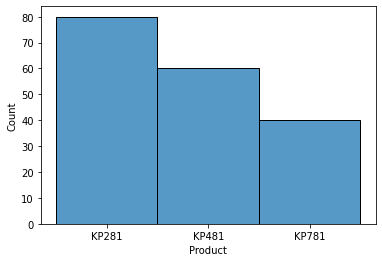

In [ ]:
sns.histplot(data=data, x = 'Product')

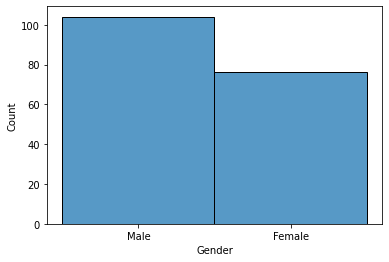

In [ ]:
sns.histplot(data=data,x = 'Gender')

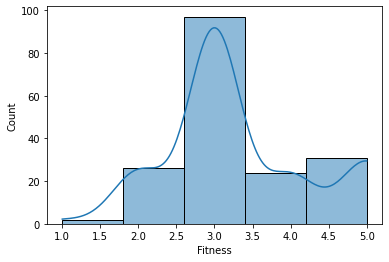

In [ ]:
sns.histplot(data=data, x = 'Fitness',bins = 5,kde = True)


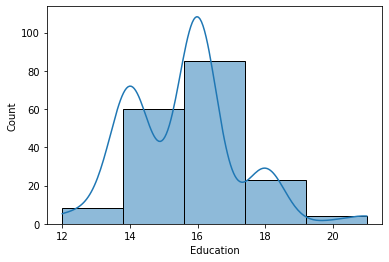

In [ ]:
sns.histplot(data=data, x = 'Education',bins = 5,kde = True)

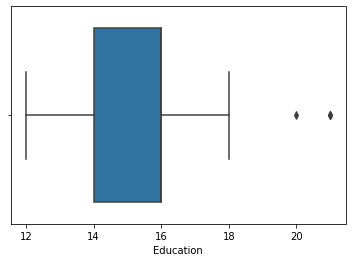

In [ ]:
sns.boxplot(data = data, x = 'Education')

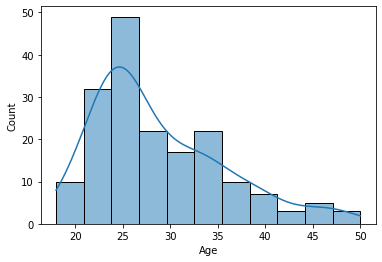

In [ ]:
sns.histplot(data['Age'],kde = True)


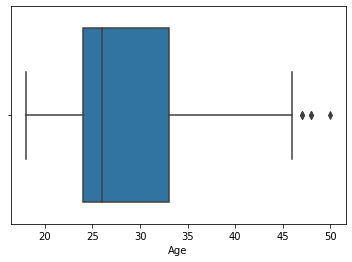

In [ ]:
sns.boxplot(data = data, x = 'Age')

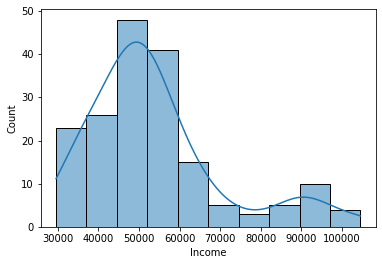

In [ ]:
sns.histplot(data=data, x = 'Income',kde = True, bins = 10)

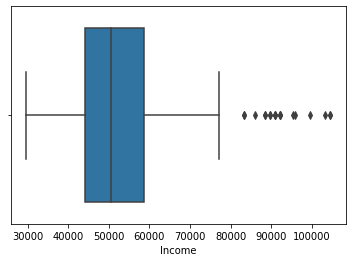

In [ ]:
sns.boxplot(data = data, x = 'Income')

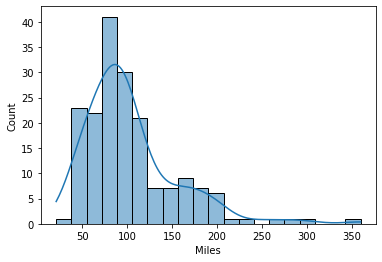

In [ ]:
sns.histplot(data=data, x = 'Miles',kde = True)

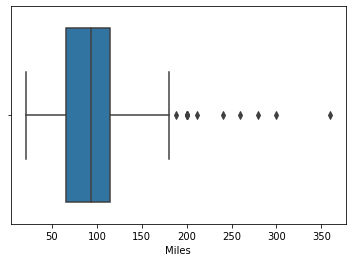

In [ ]:
sns.boxplot(data = data, x = 'Miles')

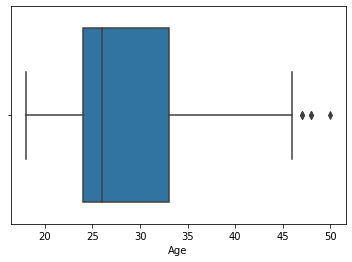

In [ ]:
sns.boxplot(data = data, x = 'Age')

##Bi-Variate Analysis

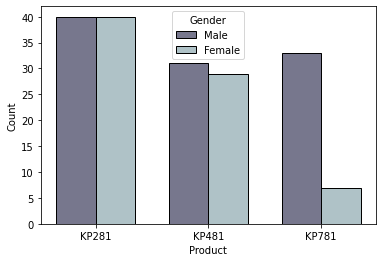

In [ ]:
sns.histplot(data=data,x = 'Product',hue = 'Gender',shrink = 0.7,multiple = 'dodge',palette='bone')

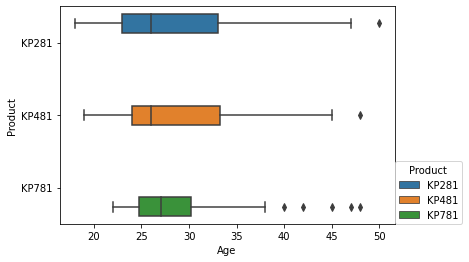

In [ ]:
s = sns.boxplot(data = data, x = 'Age',y = 'Product', hue = 'Product')
sns.move_legend(s,loc=(1,0))

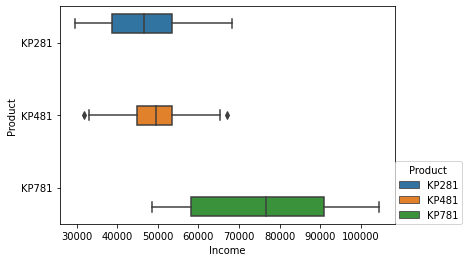

In [ ]:
s = sns.boxplot(data = data, x = 'Income',y = 'Product', hue = 'Product')
sns.move_legend(s,loc=(1,0))

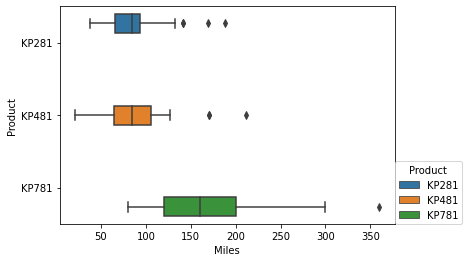

In [ ]:
s = sns.boxplot(data = data, x = 'Miles',y = 'Product', hue = 'Product')
sns.move_legend(s,loc=(1,0))

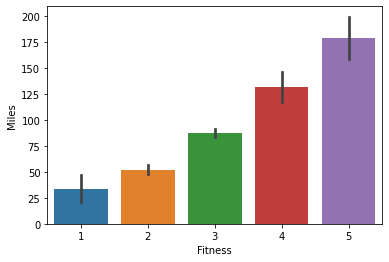

In [ ]:
sns.barplot(data = data, x = 'Fitness', y = 'Miles')

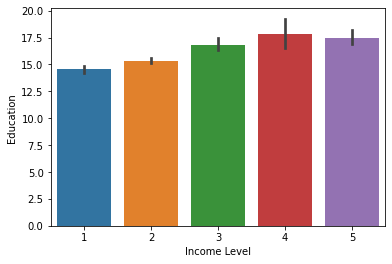

In [ ]:
sns.barplot(data = data, x = 'Income Level', y = 'Education')

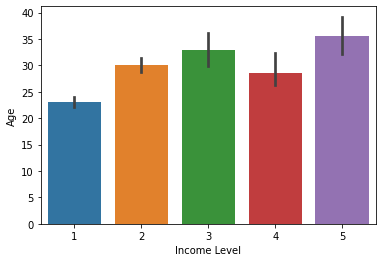

In [ ]:
sns.barplot(data = data, x = 'Income Level', y = 'Age')

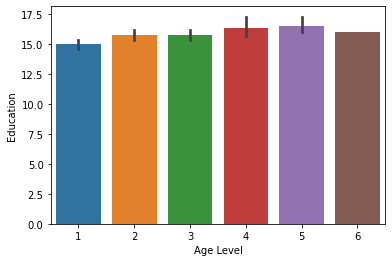

In [ ]:
sns.barplot(data = data, x = 'Age Level', y = 'Education')

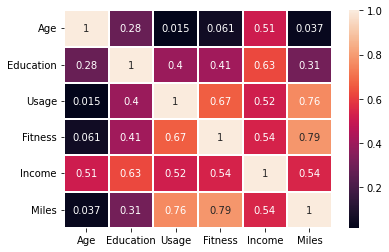

In [ ]:
sns.heatmap(data.corr(),annot = True,linewidth = 1)

Text(0.5, 15.0, 'Income Level')

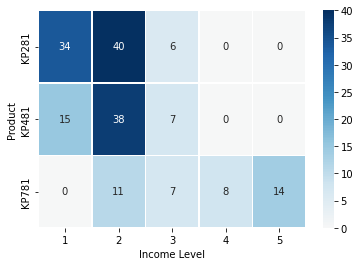

In [ ]:
x = data.groupby('Product')['Income Level'].value_counts().unstack().fillna(0)
sns.heatmap(x,cmap = 'RdBu',center = 0,annot = True,linewidth=.5)
plt.xlabel('Income Level')

Text(0.5, 15.0, 'Age Level')

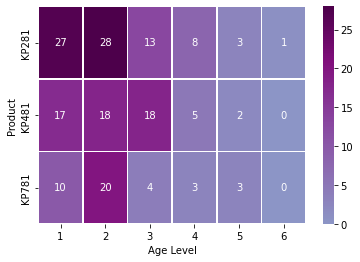

In [ ]:
x = data.groupby('Product')['Age Level'].value_counts().unstack().fillna(0)
sns.heatmap(x,cmap = 'BuPu',center = 0,annot = True,linewidth=.5)
plt.xlabel('Age Level')

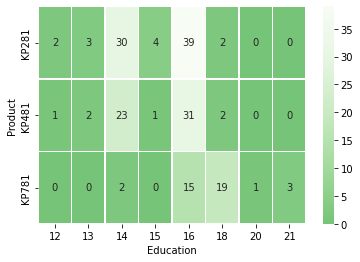

In [ ]:
x = data.groupby('Product')['Education'].value_counts().unstack().fillna(0)
sns.heatmap(x,cmap = 'Greens_r',center = 0,annot = True,linewidth=.5)

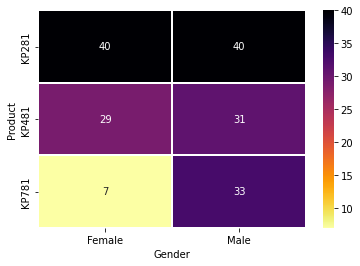

In [ ]:
x = data.groupby('Product')['Gender'].value_counts().unstack().fillna(0)
sns.heatmap(x,cmap = 'inferno_r',annot = True,linewidth=1)

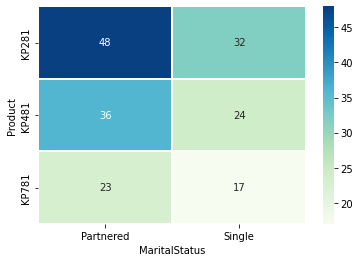

In [ ]:
x = data.groupby('Product')['MaritalStatus'].value_counts().unstack().fillna(0)
sns.heatmap(x,cmap = 'GnBu',annot = True,linewidth=1)

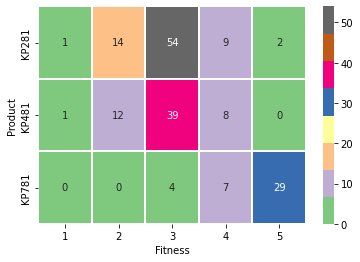

In [ ]:
x = data.groupby('Product')['Fitness'].value_counts().unstack().fillna(0)
sns.heatmap(x,cmap = 'Accent',annot = True,linewidth=1)

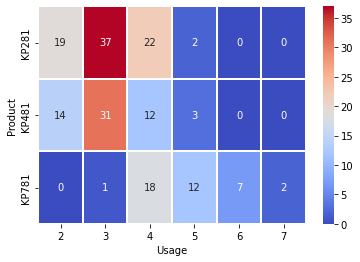

In [ ]:
x = data.groupby('Product')['Usage'].value_counts().unstack().fillna(0)
sns.heatmap(x,cmap = 'coolwarm',annot = True,linewidth=1)

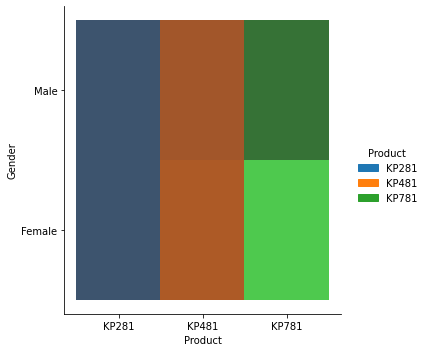

In [ ]:
sns.displot(x='Product',y='Gender',data=data,hue='Product')

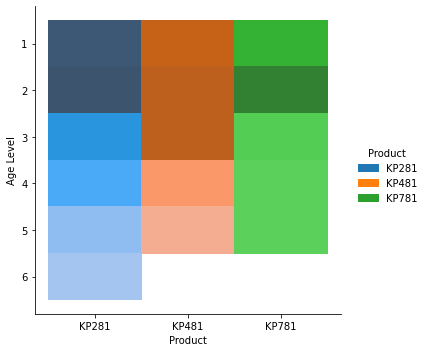

In [ ]:
sns.displot(x='Product',y='Age Level',data=data,hue='Product')

<Figure size 576x432 with 0 Axes>

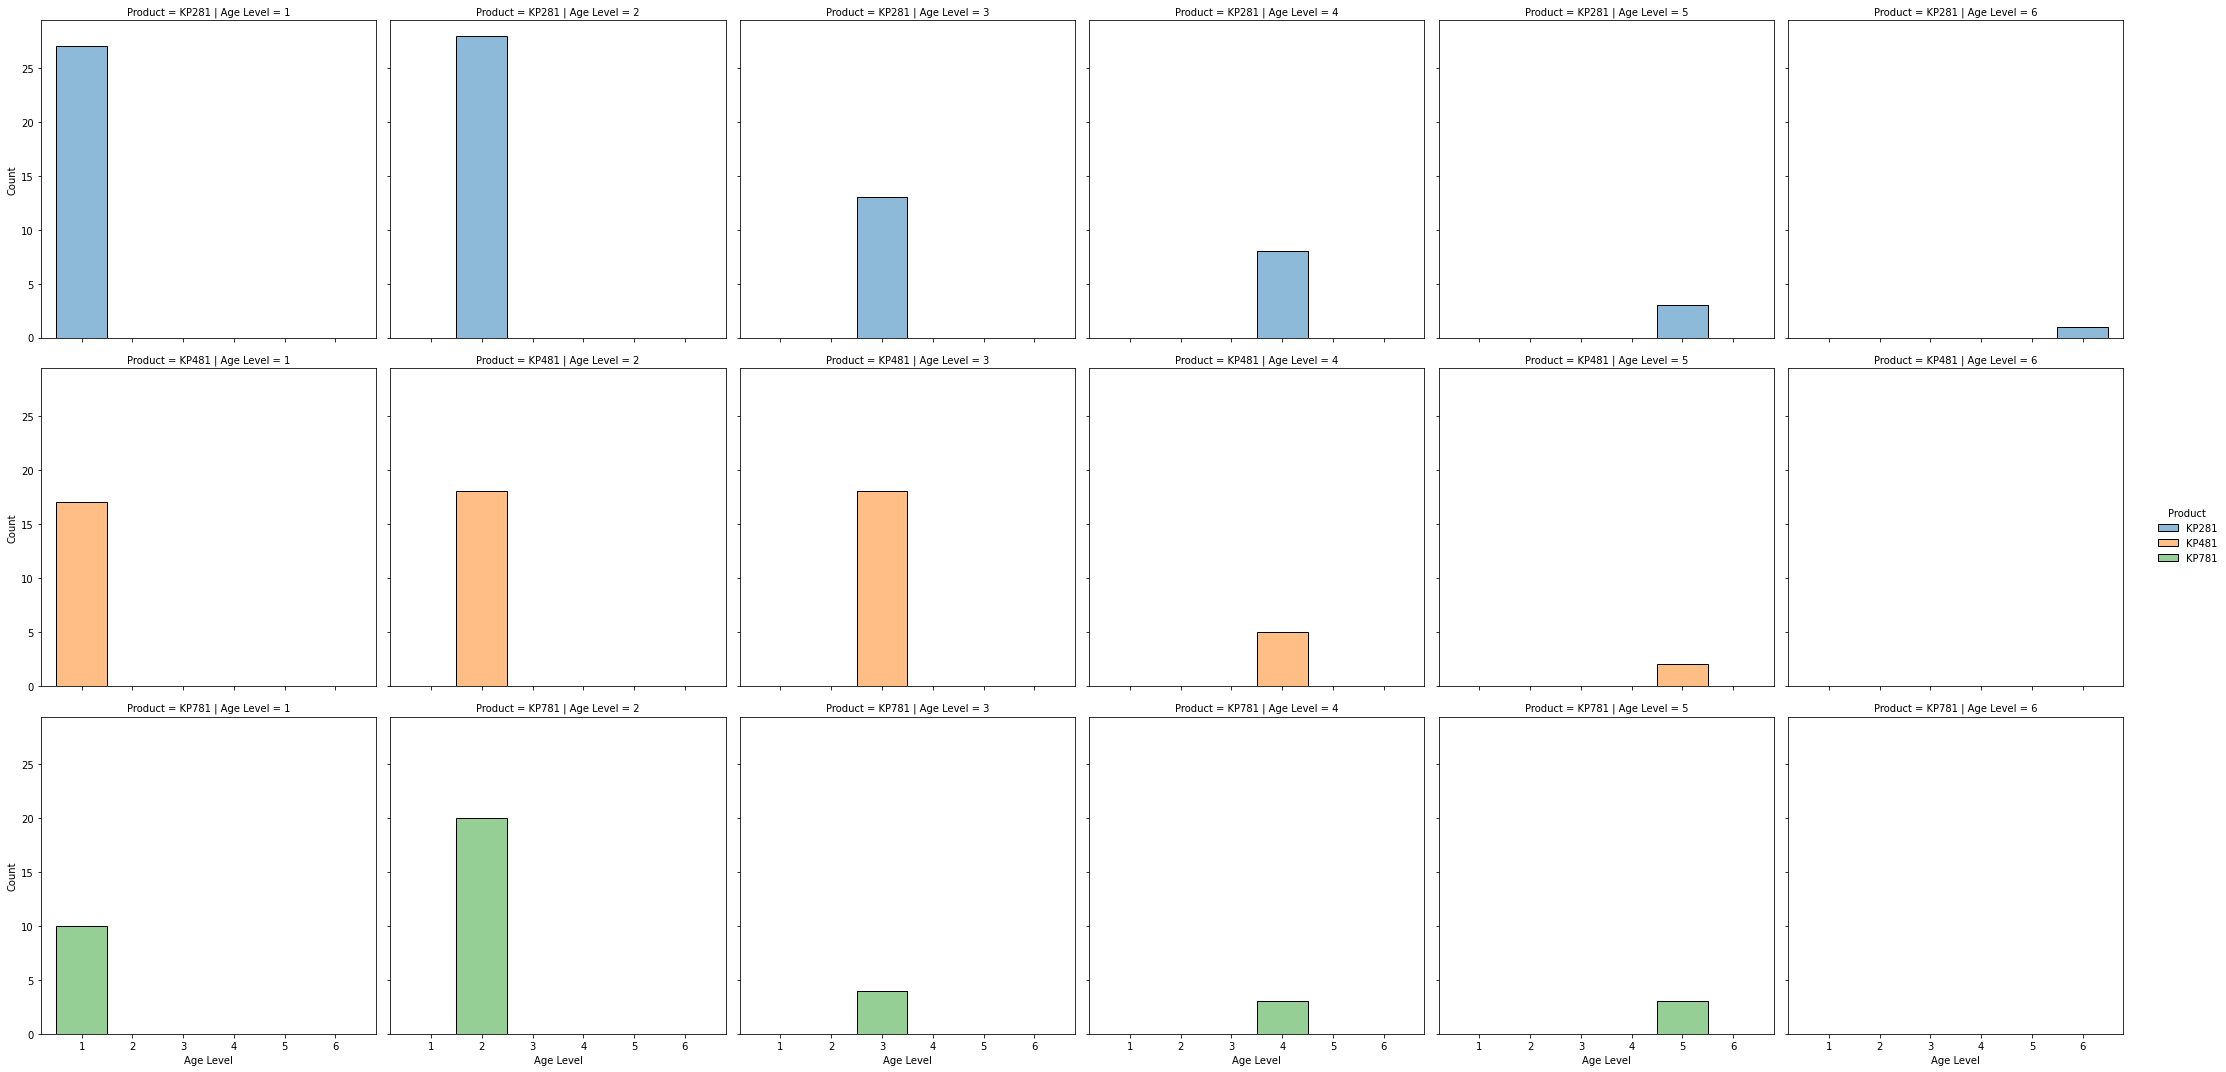

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(x='Age Level',data=data,hue='Product',col='Age Level',row='Product',facet_kws={'despine':False})


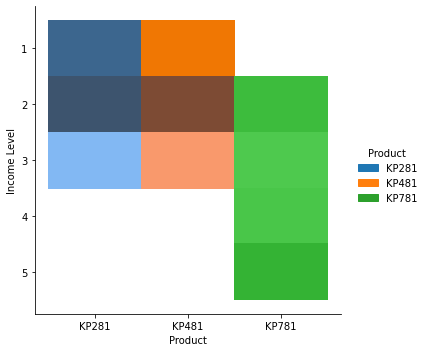

In [ ]:
sns.displot(x='Product',y='Income Level',data=data,hue='Product')

<Figure size 576x432 with 0 Axes>

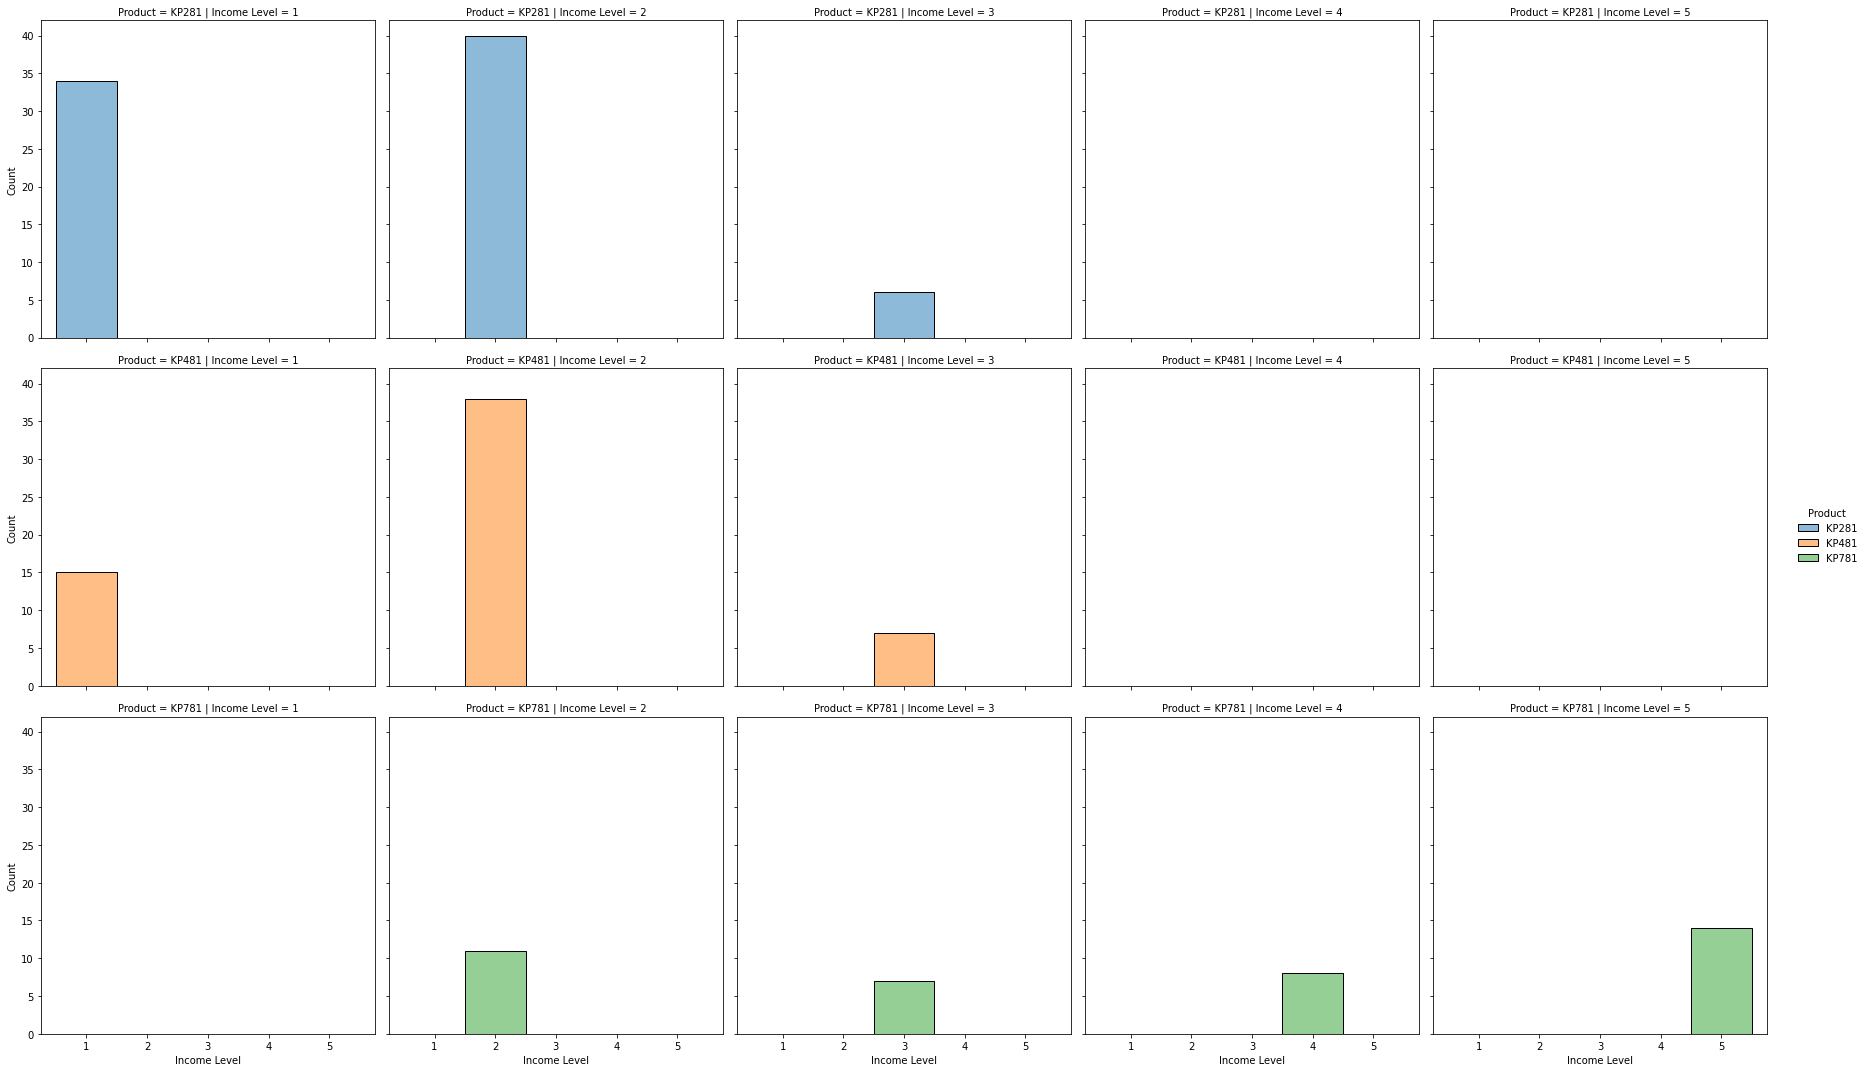

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(x='Income Level',data=data,hue='Product',col='Income Level',row='Product',facet_kws={'despine':False})

<Figure size 576x432 with 0 Axes>

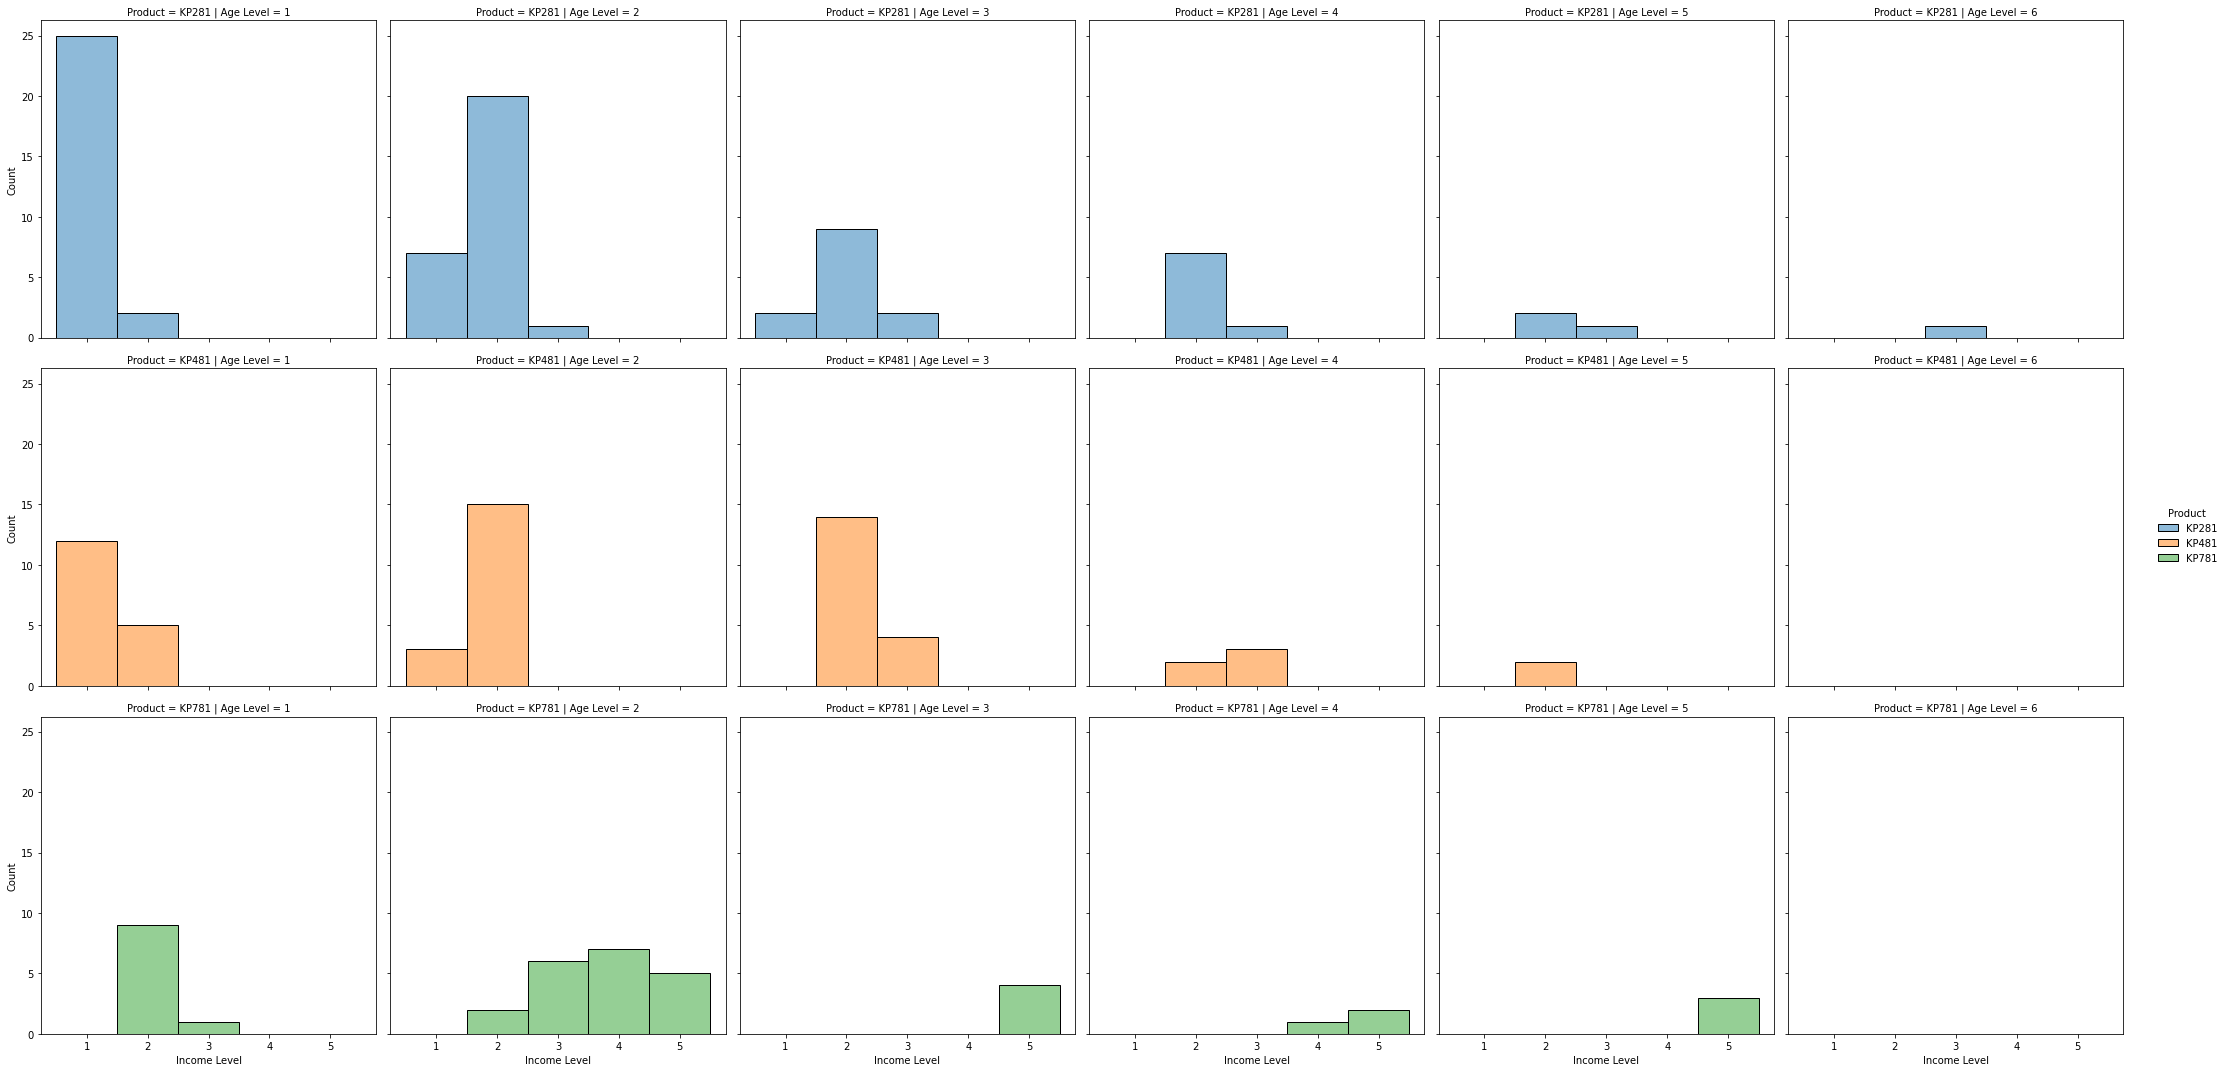

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(x='Income Level',data=data,hue='Product',col='Age Level',row='Product',facet_kws={'despine':False})


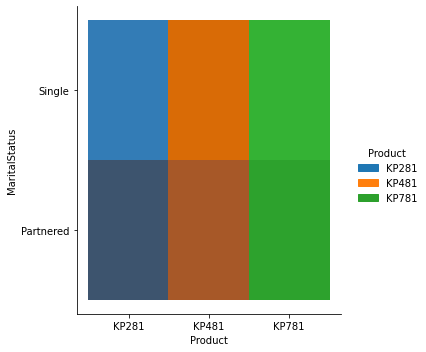

In [ ]:
sns.displot(x='Product',y='MaritalStatus',data=data,hue='Product')

<Figure size 576x432 with 0 Axes>

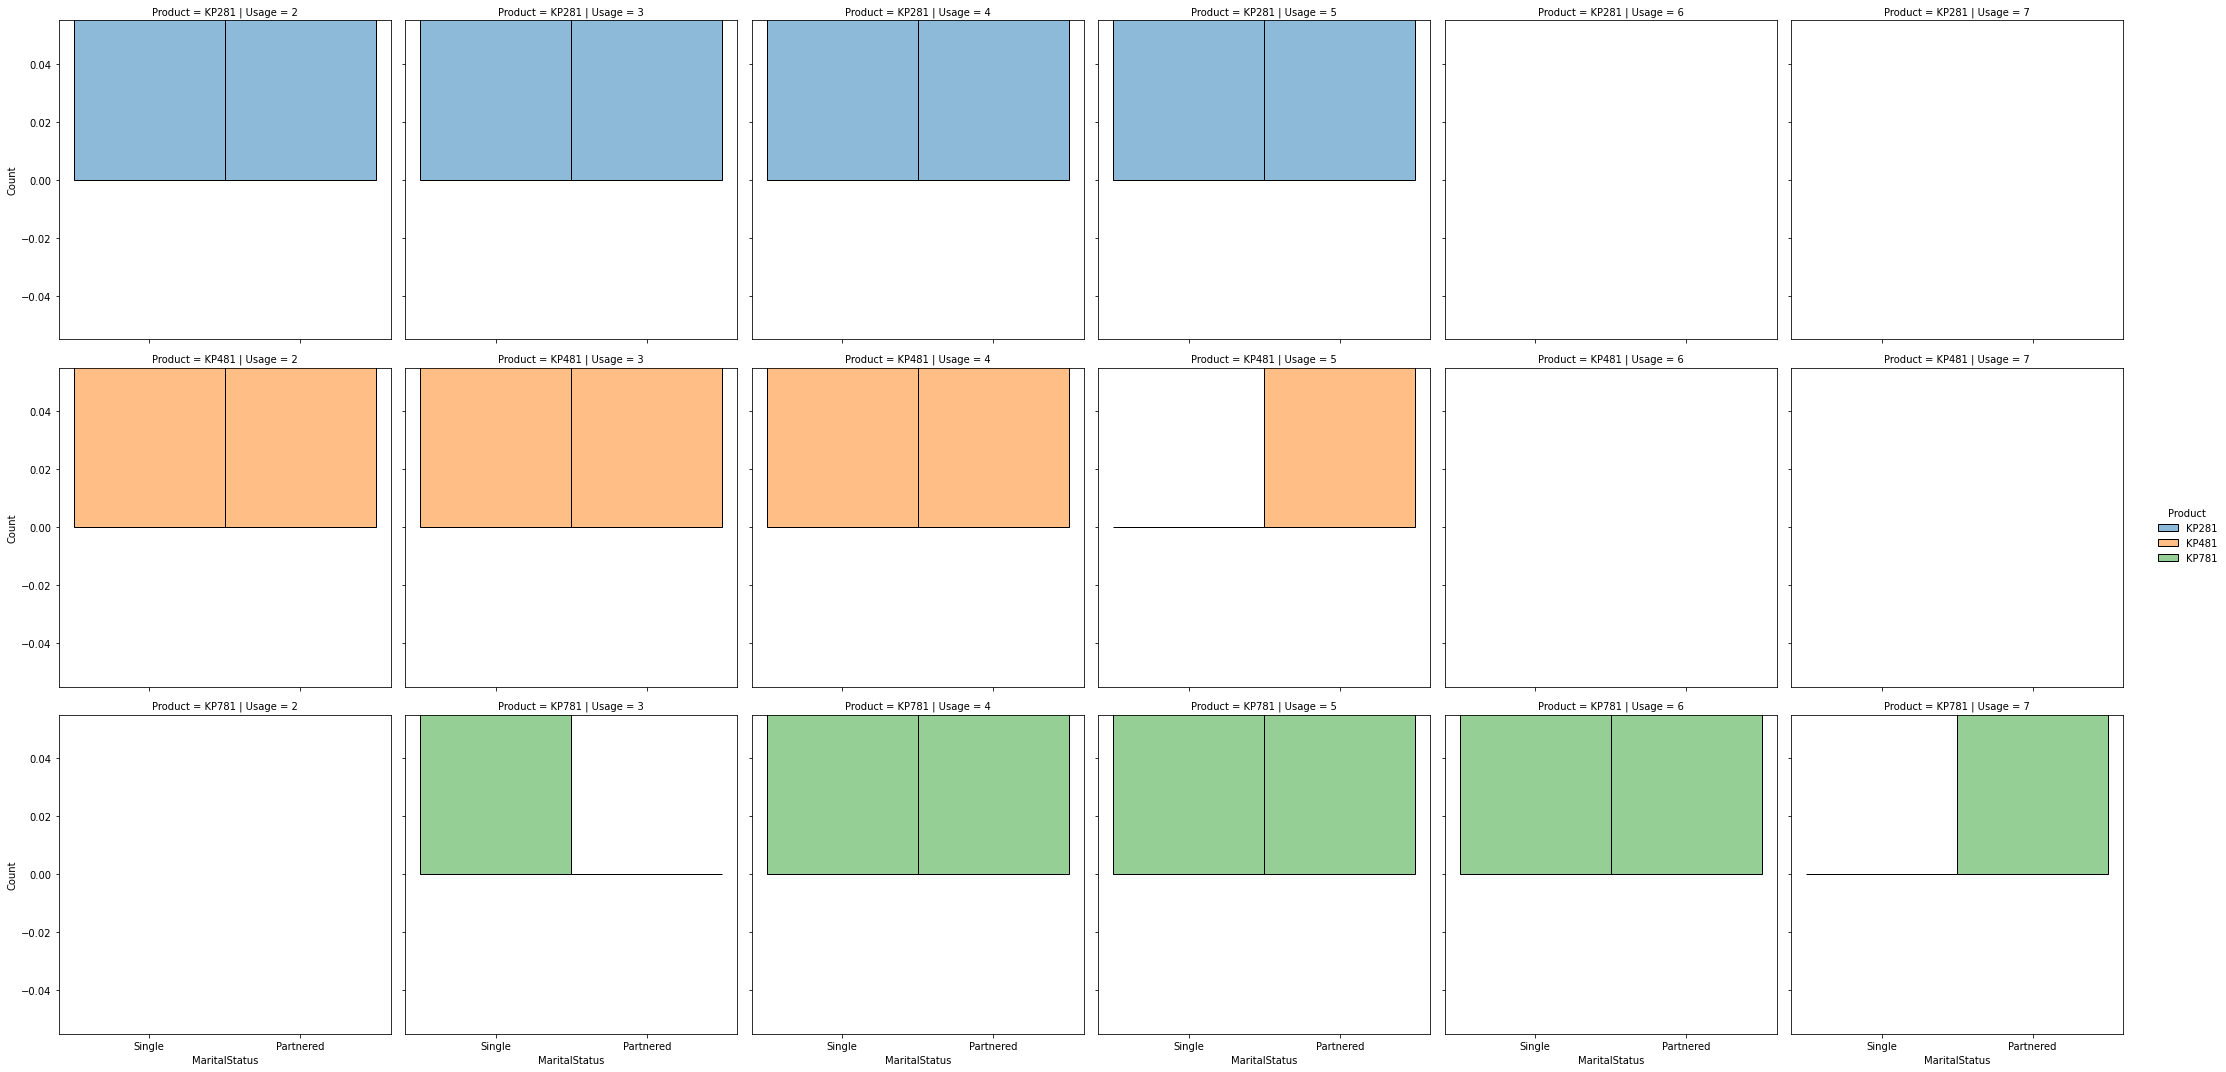

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(x='MaritalStatus',data=data,hue='Product',col='Usage',row='Product',facet_kws={'despine':False})

<Figure size 576x432 with 0 Axes>

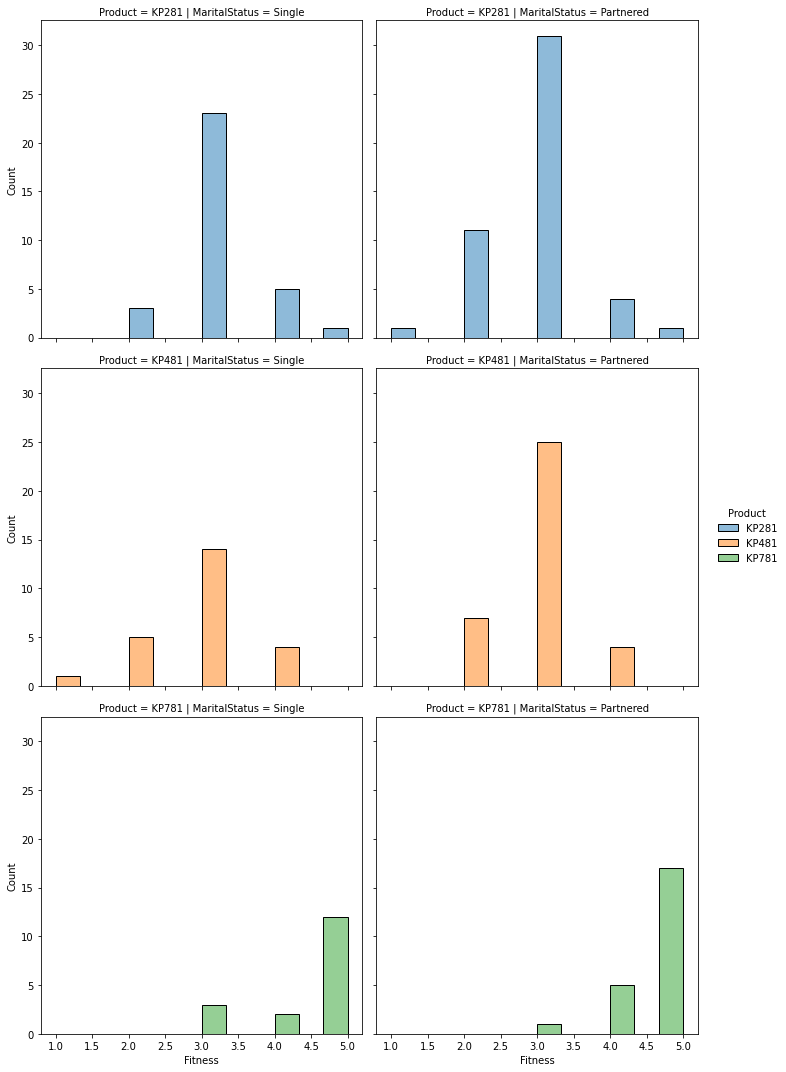

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(x='Fitness',data=data,hue='Product',col='MaritalStatus',row='Product',facet_kws={'despine':False})

<Figure size 576x432 with 0 Axes>

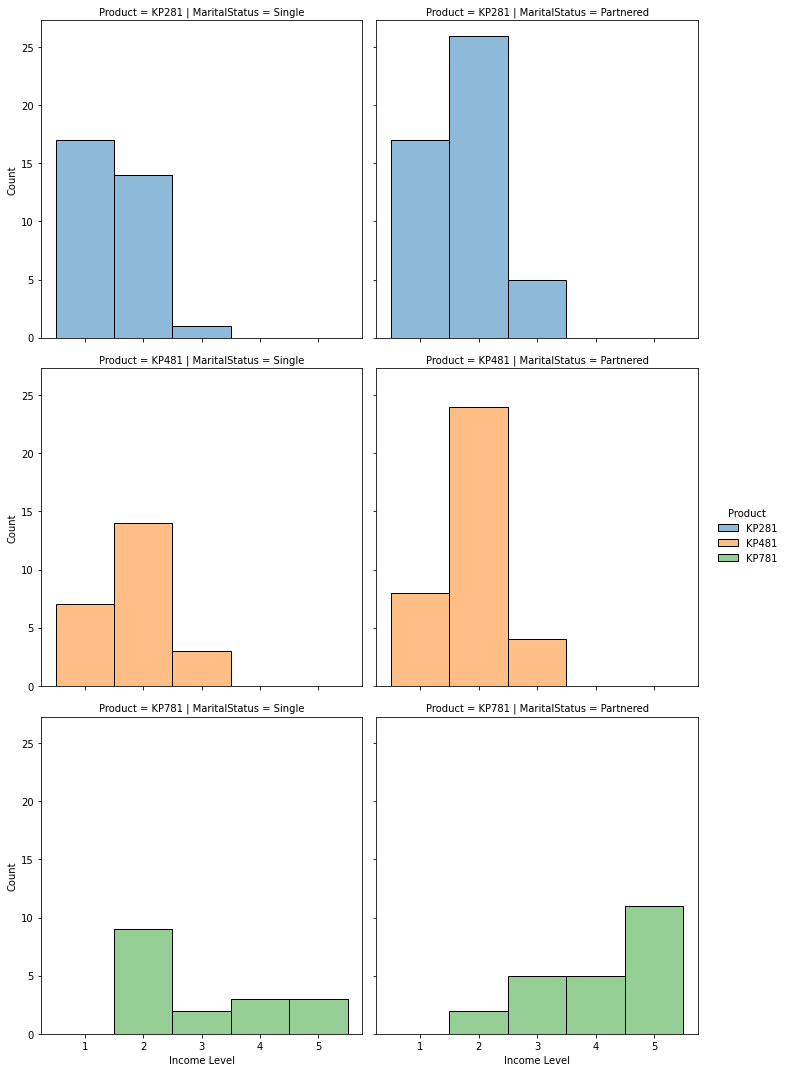

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(x='Income Level',data=data,hue='Product',col='MaritalStatus',row='Product',facet_kws={'despine':False})

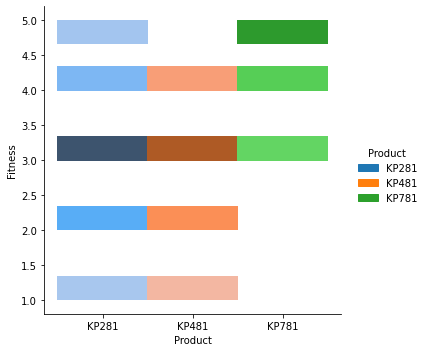

In [ ]:
sns.displot(x='Product',y='Fitness',data=data,hue='Product')

<Figure size 576x432 with 0 Axes>

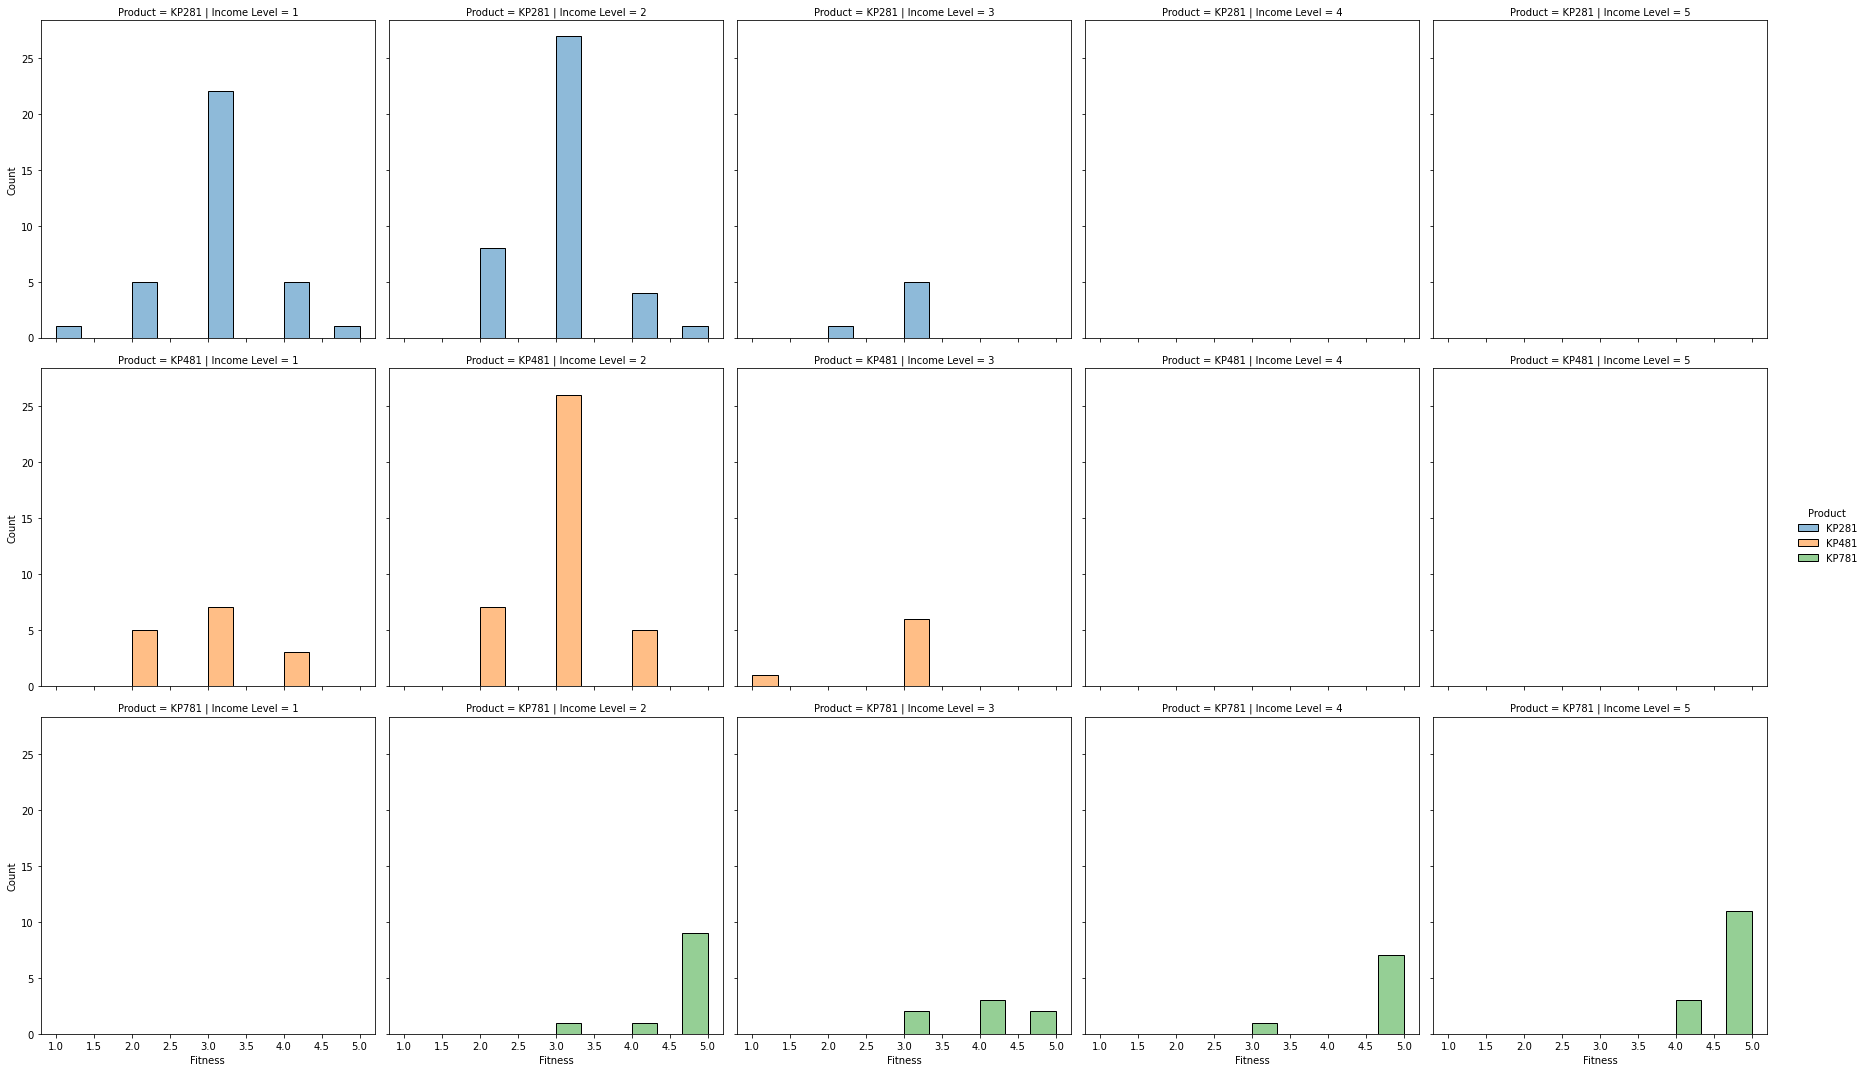

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(x='Fitness',data=data,hue='Product',col='Income Level',row='Product',facet_kws={'despine':False})


<Figure size 576x432 with 0 Axes>

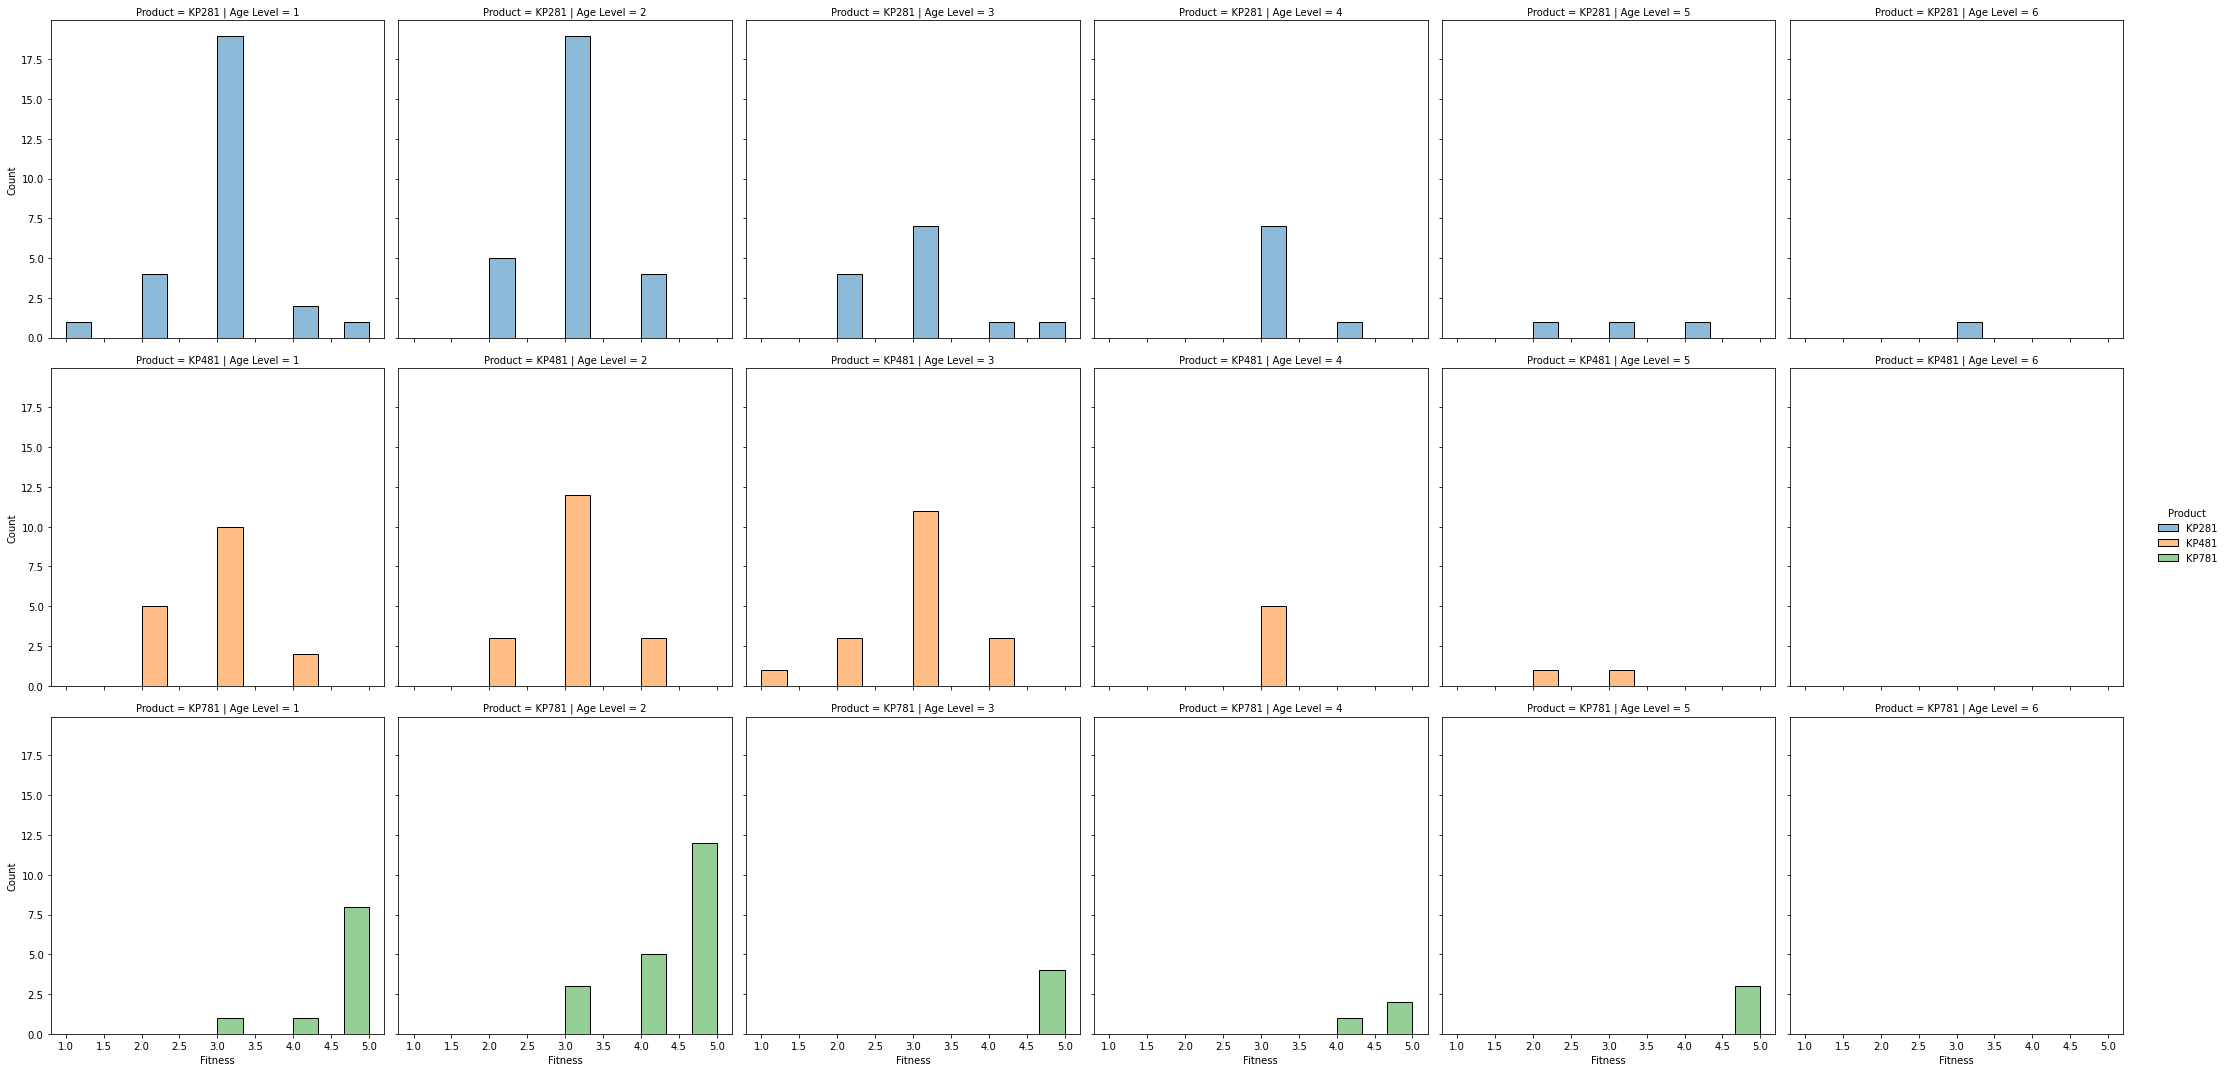

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(x='Fitness',data=data,hue='Product',col='Age Level',row='Product',facet_kws={'despine':False})

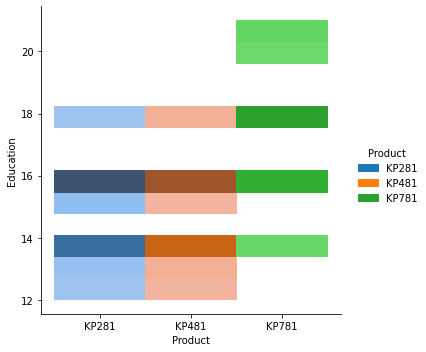

In [ ]:
sns.displot(x='Product',y='Education',data=data,hue='Product')

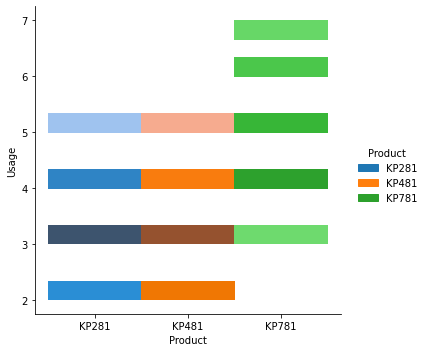

In [ ]:
sns.displot(x='Product',y='Usage',data=data,hue='Product')

<Figure size 576x432 with 0 Axes>

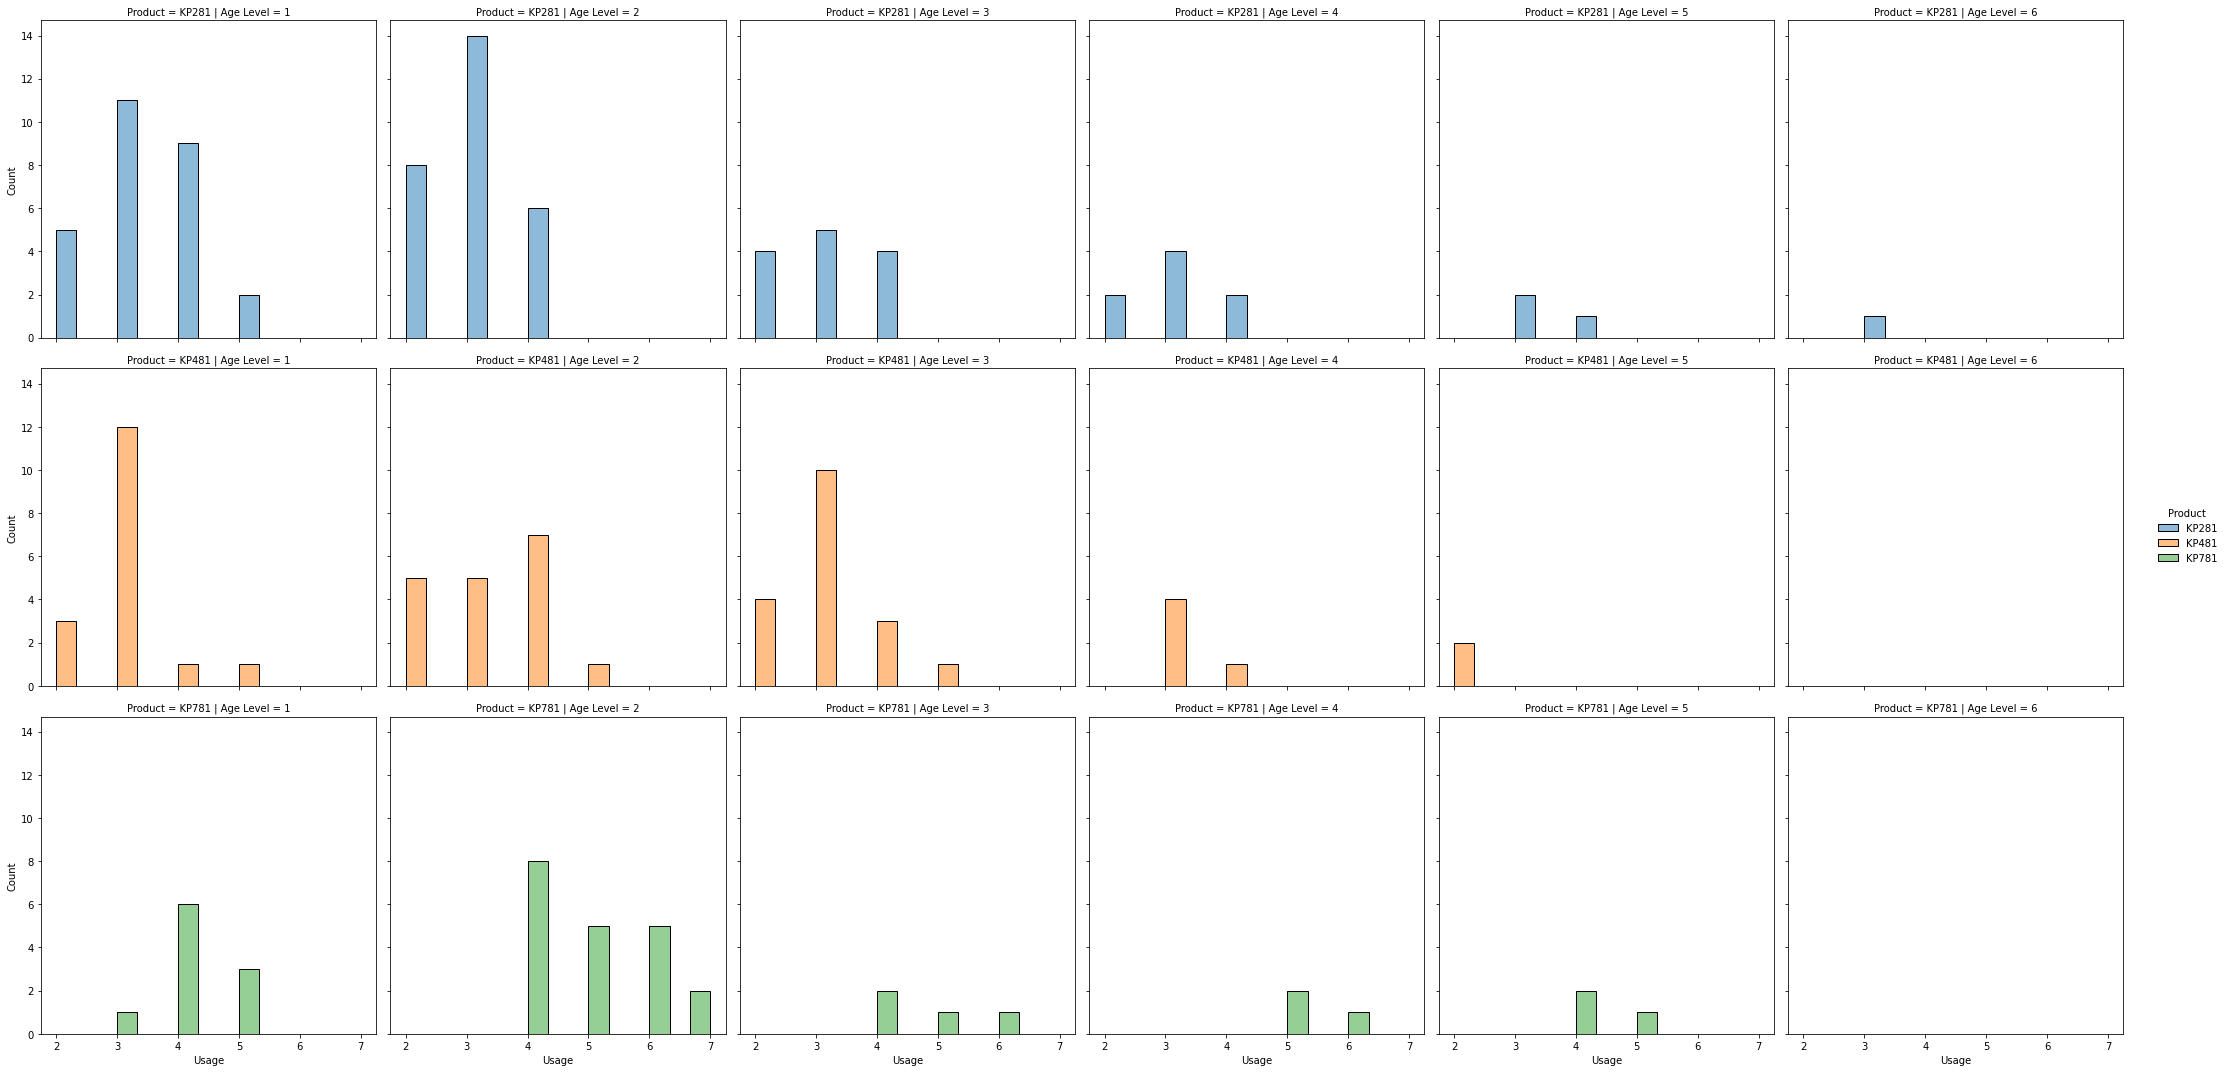

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(x='Usage',data=data,hue='Product',col='Age Level',row='Product',facet_kws={'despine':False})

<Figure size 576x432 with 0 Axes>

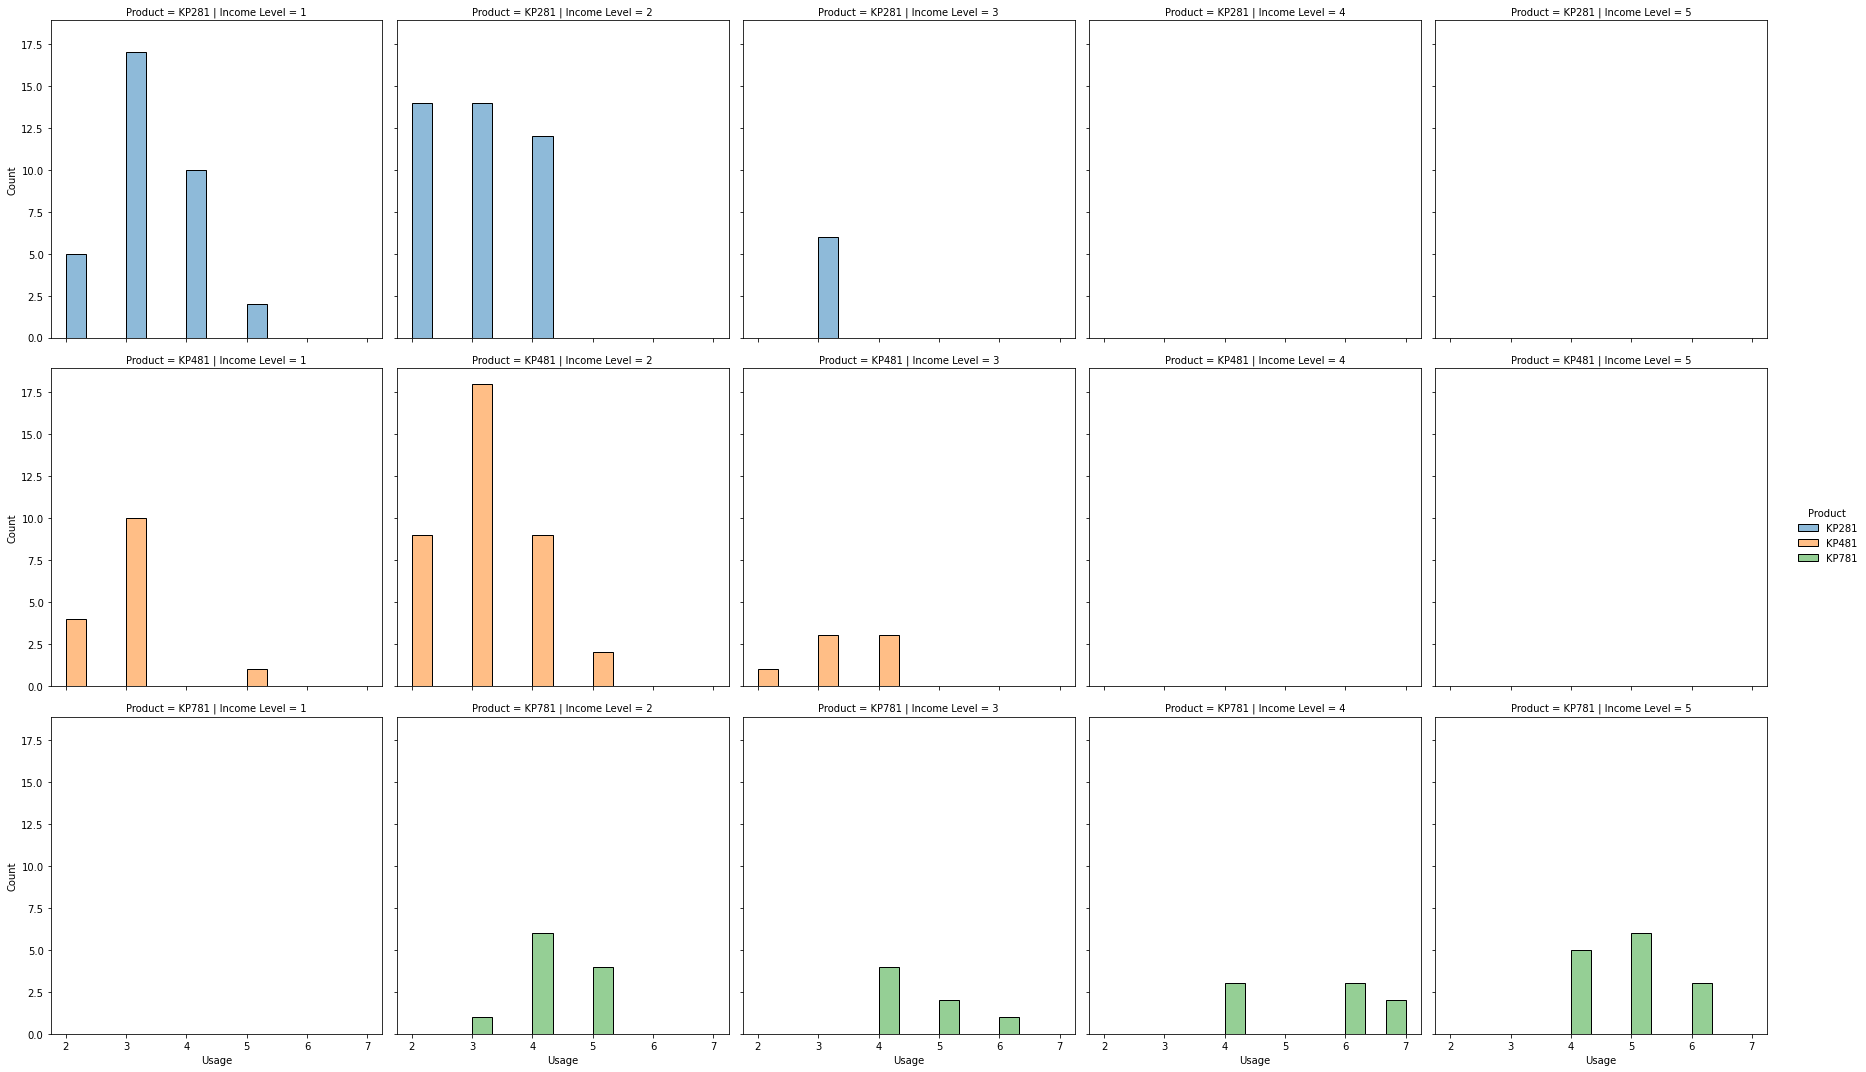

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(x='Usage',data=data,hue='Product',col='Income Level',row='Product',facet_kws={'despine':False})

<Figure size 576x432 with 0 Axes>

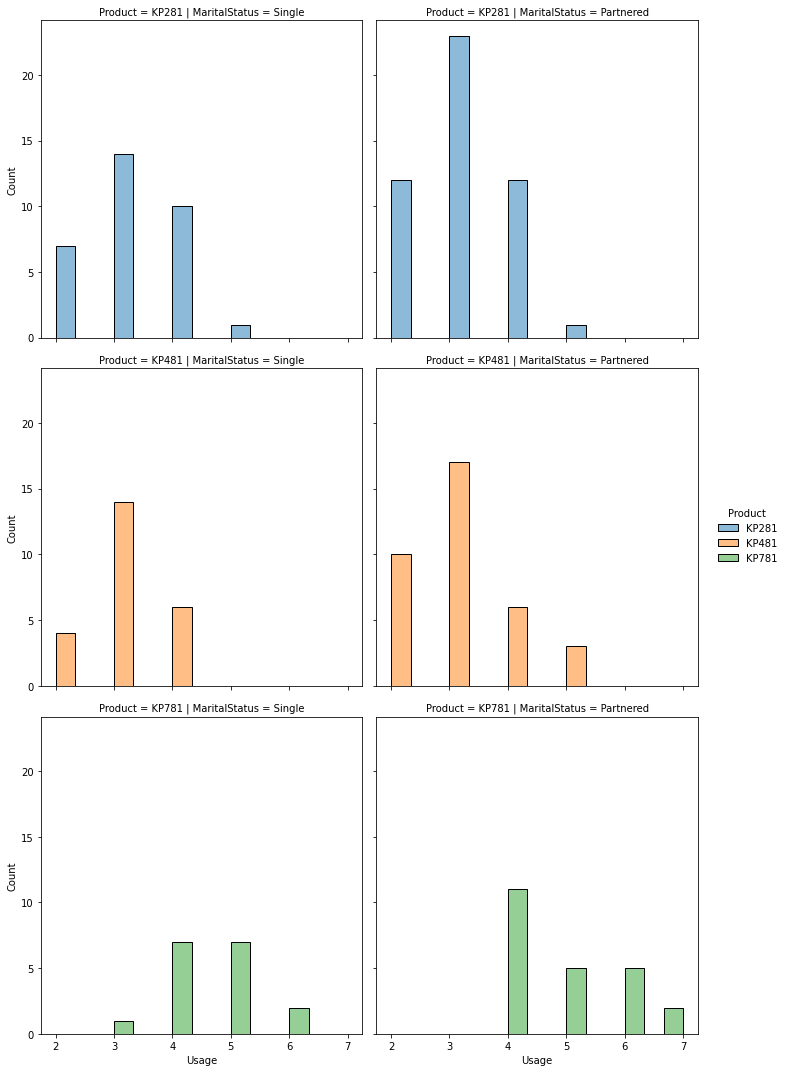

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(x='Usage',data=data,hue='Product',col='MaritalStatus',row='Product',facet_kws={'despine':False})

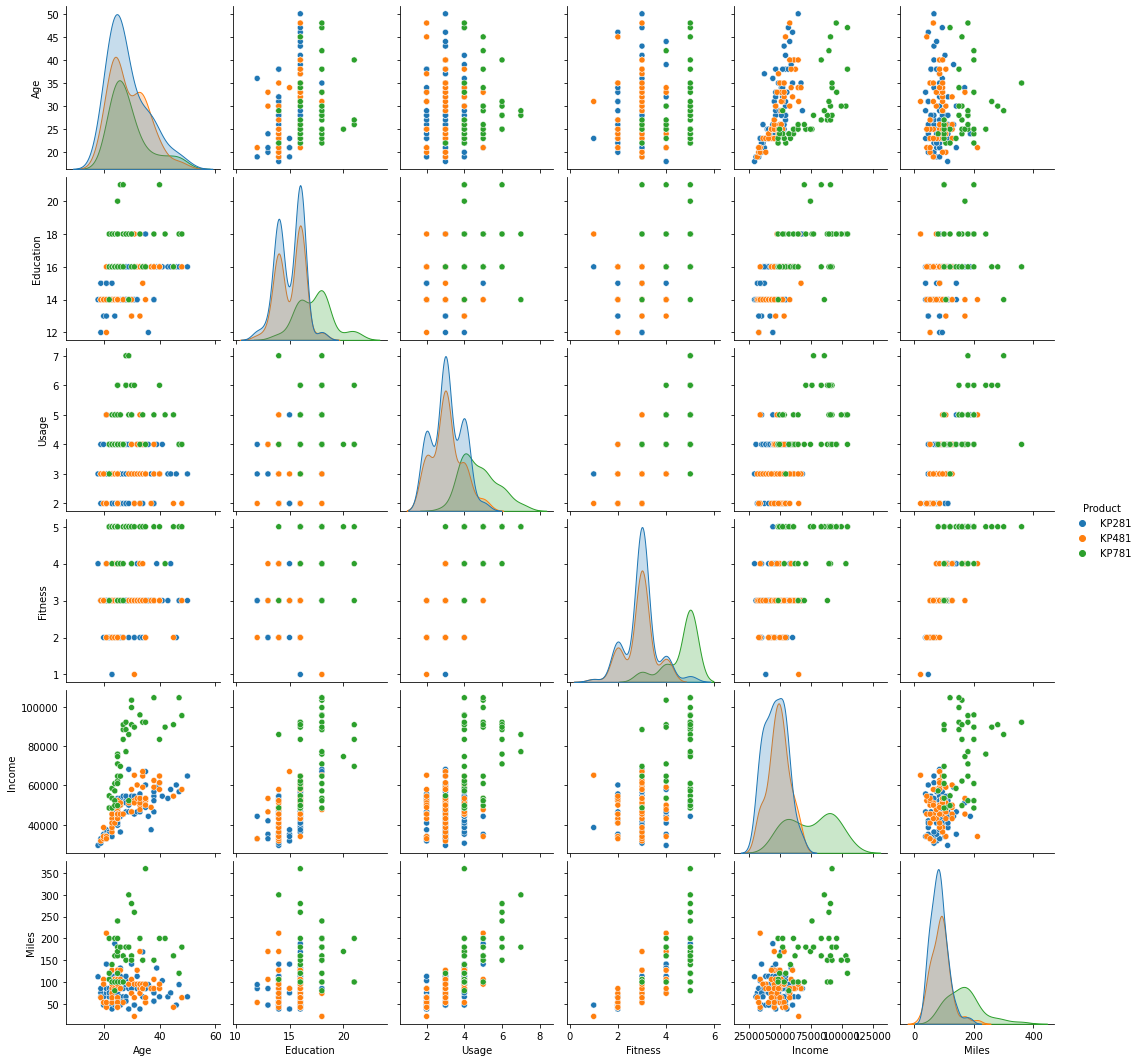

In [ ]:
sns.pairplot(data,diag_kind = 'kde',hue = 'Product')

In [ ]:
#Dist Plot 
